# Easy Visa (Visa Application Analysis and Classification)

## Overview

This project focuses on analyzing and predicting visa application outcomes using machine learning. The Office of Foreign Labor Certification (OFLC) processes thousands of applications for employers seeking to bring foreign workers into the U.S. every year. As the number of applications increases, it becomes increasingly tedious to manually review all cases.

This project aims to:
- Facilitate the process of visa approvals using a machine learning classification model.
- Recommend a suitable profile for applicants based on the significant factors that influence visa approval or denial.

## Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions, a 9% increase from the previous year. Given this increasing number of applications, the goal of this project is to develop a **Machine Learning** solution that helps predict visa certification outcomes and shortlists candidates with a higher likelihood of approval.

## Dataset Description

The dataset contains attributes related to both the employee (foreign worker) and the employer. Below are key columns in the data:

- **case_id**: ID of each visa application.
- **continent**: Continent of the employee.
- **education_of_employee**: Employee's education level.
- **has_job_experience**: Indicates if the employee has previous job experience (Y/N).
- **requires_job_training**: Indicates if job training is required (Y/N).
- **no_of_employees**: Number of employees in the employer's company.
- **yr_of_estab**: Year the employer's company was established.
- **region_of_employment**: U.S. region where the foreign worker is employed.
- **prevailing_wage**: Average wage paid to similarly employed workers in the occupation area.
- **unit_of_wage**: Wage unit (Hourly, Weekly, Monthly, Yearly).
- **full_time_position**: Whether the position is full-time (Y/N).
- **case_status**: Visa certification status (Certified/Denied).

## Exploratory Data Analysis (EDA) Questions

The EDA seeks to answer key questions that will help us understand the drivers of visa certification:

1. **Education and Certification**: Does education level impact visa certification?
2. **Continent and Visa Status**: How does visa certification vary across different continents?
3. **Work Experience**: Does having job experience influence visa approval?
4. **Wage Unit**: Which wage unit (Hourly, Weekly, Monthly, Yearly) is most likely to lead to visa certification?
5. **Prevailing Wage**: How does visa status change with different levels of prevailing wage?

In [294]:
# install XgBoost,catboost,lightbgm
!pip install xgboost
!pip install catboost
!pip install lightgbm

In [295]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Library to help with statistical analysis
import scipy.stats as stats
from mpl_toolkits.mplot3d import axes3d
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap
# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
# To build model for prediction
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# Import standard scalar
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import timeit
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [296]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [297]:
path='/content/drive/MyDrive/Python Course'

In [298]:
# store pellete for future use
pellete='Set2'
colors = sns.color_palette(pellete)  # Get Set2 color palette for future use
sns.set(style="darkgrid") # Set grid style

## **Data Overview**

- Observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- Get information about the number of rows and columns in the dataset
- Find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- Check the statistical summary of the dataset to get an overview of the numerical columns of the data
- Check for missing values
- Check for null values

In [299]:
# load the data in to panda dataframe
ez_df=pd.read_csv(f'{path}/EasyVisa.csv')

In [300]:
# Deep copy the dataframe
ezdf=ez_df.copy(deep=True)

In [301]:
# Detail info about the dataset
ezdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


### Observations:
The dataset contains 12 columns.  
Below is the summary:

#### Dataset Summary

| Column                               | Data Type | Non-Null Count | Description                               |
|--------------------------------------|-----------|----------------|-------------------------------------------|
| `case_id`                           | Object    | 25480          | Unique identifier for each case          |
| `continent`                         | Object    | 25480          | Continent of the employment region        |
| `education_of_employee`             | Object    | 25480          | Education level of the employee           |
| `has_job_experience`                | Object    | 25480          | Indicates if the employee has experience  |
| `requires_job_training`             | Object    | 25480          | Indicates if training is required         |
| `no_of_employees`                   | Int64     | 25480          | Number of employees in the organization   |
| `yr_of_estab`                       | Int64     | 25480          | Year of establishment                      |
| `region_of_employment`              | Object    | 25480          | Region of employment                       |
| `prevailing_wage`                   | Float64   | 25480          | Wage prevailing in the region             |
| `unit_of_wage`                      | Object    | 25480          | Unit of wage (hourly, yearly, etc.)      |
| `full_time_position`                | Object    | 25480          | Indicates if the position is full-time    |
| `case_status`                       | Object    | 25480          | Status of the case (approved, denied, etc.) |


In [302]:
# Check null values
ezdf.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


In [303]:
ezdf.shape

(25480, 12)

### Observations:
There are 25480 rows and 12 colums in the dataset. The dataframe has no null value. Row 5 , 6 and 8 has numeric values.

In [304]:
ezdf.head(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


### Observations:

#### Categorical Columns
- `case_id` (Object)
- `continent` (Object)
- `education_of_employee` (Object)
- `has_job_experience` (Object)
- `requires_job_training` (Object)
- `region_of_employment` (Object)
- `unit_of_wage` (Object)
- `full_time_position` (Object)
- `case_status` (Object)

#### Numerical Columns
- `no_of_employees` (Int64)
- `yr_of_estab` (Int64)
- `prevailing_wage` (Float64)

### Summary
- **Total Categorical Columns:** 9
- **Total Numerical Columns:** 3

In [305]:
# Check for duplicates in dataset
has_duplicates = ezdf.duplicated().any()

print(f"Does the DataFrame have duplicates? {has_duplicates}")

Does the DataFrame have duplicates? False


In [306]:
# Unique values
# Take all catgorical columns apart from case_id as this column seems to be unique column for joining or ref
catgoricalcol=ezdf.select_dtypes(include=['object']).columns[1:]
for col in catgoricalcol:
  print(f'Unique values in {col}:')
  print(ezdf[col].unique())

Unique values in continent:
['Asia' 'Africa' 'North America' 'Europe' 'South America' 'Oceania']
Unique values in education_of_employee:
['High School' "Master's" "Bachelor's" 'Doctorate']
Unique values in has_job_experience:
['N' 'Y']
Unique values in requires_job_training:
['N' 'Y']
Unique values in region_of_employment:
['West' 'Northeast' 'South' 'Midwest' 'Island']
Unique values in unit_of_wage:
['Hour' 'Year' 'Week' 'Month']
Unique values in full_time_position:
['Y' 'N']
Unique values in case_status:
['Denied' 'Certified']


### Observations:
#### Unique Values for Categorical Columns

- **Continent:**
  - `['Asia', 'Africa', 'North America', 'Europe', 'South America', 'Oceania']`
  
- **Education of Employee:**
  - `['High School', "Master's", "Bachelor's", 'Doctorate']`
  
- **Has Job Experience:**
  - `['N', 'Y']`
  
- **Requires Job Training:**
  - `['N', 'Y']`
  
- **Region of Employment:**
  - `['West', 'Northeast', 'South', 'Midwest', 'Island']`
  
- **Unit of Wage:**
  - `['Hour', 'Year', 'Week', 'Month']`
  
- **Full-Time Position:**
  - `['Y', 'N']`
  
- **Case Status:**
  - `['Denied', 'Certified']`


In [307]:
# Printing no of values in each of these catgorical variable
for col in catgoricalcol:
  print(f'No of values in each {col}:')
  print(ezdf[col].value_counts(normalize=True)*100)

No of values in each continent:
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
No of values in each education_of_employee:
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
No of values in each has_job_experience:
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
No of values in each requires_job_training:
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
No of values in each region_of_employment:
region_of_employment
Northeast    28.237834
South        27.539246
West         25.847724
Midwest      16.903454
Island        1.471743
Name: proportion, dtype: float64
No of values in each unit_of_wage:
unit_of_wage
Year     90.117739
Hour      8.465463
Week      1.06

### Observations:
- Highest number of visa applications are from Asia (66%)
- Most of the people who applied for visa have bachelors degree(40%)
- Most of the pople has experienced  in the job which they are apply for in abroad.(58%)
- Most of the people who applied for visa doesnot need any trainings(88%).We can assume that as people are experienced so they might not be needing trainings
- Northeast region employment has highest no of visa though other regions are not far behind(28%)
- Around 90% of peoplew who applied for visa are applying job on yearly wage rate
- Most of the people who applied for visa are for full time employment(89%)
- The approval  rate of visa is much higher the rejection (66%)


In [308]:
ezdf.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


### Observations:
- The min value for no_of_employees is -26 (This seems to be an problem as nagative of employees does not make sense it)
- There is huge gap between 75% in no of employees i.e 3504 where as max value is 602069 .This might be due to large orginzation who has more man power.
- Average prevailing wage is $74455.There's also a very huge difference in 75th percentile and maximum value.SO there might be some outliers.
- The oldest company who has applied for visa for its employee is established in 1800



In [309]:
# Filter all values with nagative number of employees
ezdf[ezdf['no_of_employees']<0]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,EZYV6635,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,EZYV7225,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,EZYV7282,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,EZYV7319,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,EZYV7762,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


### Observations:
We cannot drop these rows directly as only one field **no_of_employees** have this issue where as other fields might ve playing significant role if visa is certified or denied .We will make those nagative values as positive assuming that someone might have put nagative as hyphen by mistake

In [310]:
ezdf.describe(include='object').T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


### Insights from Categorical Columns
1. **Continent:**
   - **Unique Values:** 6 (Asia, Africa, North America, Europe, South America, Oceania)
   - **Most Frequent Value:** Asia (16,861 occurrences)
   - **Insight:** A significant proportion of cases are concentrated in Asia, suggesting a possible focus area for analysis or resource allocation.

2. **Education of Employee:**
   - **Unique Values:** 4 (High School, Bachelor's, Master's, Doctorate)
   - **Most Frequent Value:** Bachelor's degree (10,234 occurrences)
   - **Insight:** The majority of employees have a Bachelor's degree, which may imply a workforce that is moderately educated, with potential implications for job requirements and training needs.

3. **Job Experience:**
   - **Unique Values:** 2 (Yes, No)
   - **Most Frequent Value:** Yes (14,802 occurrences)
   - **Insight:** A substantial number of employees possess job experience, indicating a more skilled workforce that could reduce training time and costs.

4. **Job Training Requirement:**
   - **Unique Values:** 2 (Yes, No)
   - **Most Frequent Value:** No (22,525 occurrences)
   - **Insight:** A majority of cases do not require job training, suggesting that the workforce may already be well-trained or that job roles typically do not demand extensive training.

5. **Region of Employment:**
   - **Unique Values:** 5 (West, Northeast, South, Midwest, Island)
   - **Most Frequent Value:** Northeast (7,195 occurrences)
   - **Insight:** The Northeast region has the highest representation.
6. **Unit of Wage:**
   - **Unique Values:** 4 (Hour, Year, Week, Month)
   - **Most Frequent Value:** Year (22,962 occurrences)
   - **Insight:** Most employees are compensated on an annual basis, which is typical for salaried positions, indicating a potential need to analyze wage structures and salary ranges.

7. **Full-Time Position:**
   - **Unique Values:** 2 (Yes, No)
   - **Most Frequent Value:** Yes (22,773 occurrences)
   - **Insight:** The majority of cases are full-time positions, which could reflect workforce stability and employee retention strategies.

8. **Case Status:**
   - **Unique Values:** 2 (Certified, Denied)
   - **Most Frequent Value:** Certified (17,018 occurrences)
   - **Insight:** A large number of cases are certified, which may indicate effective application processes or favorable conditions for approval.

In [311]:
# converting all object columns to category type for better processing
column=ezdf.columns[ezdf.dtypes=='object'][1:]
for col in column:
  ezdf[col]=ezdf[col].astype('category')

In [312]:
# Printing the scehma
ezdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  object  
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(8), float64(1), int64(2), object(1)
memory usage: 996.7+ KB


### Utils

In [313]:
def plot_bar_chart_percentage(df, column_name, xlabel, pellete, bar_width=0.6):
    """
    Plots the percentage distribution of a specified categorical column in a DataFrame.

    Parameters:
    - df: DataFrame containing the data.
    - column_name: The name of the column to analyze.
    - colors: List of colors for the bar plot.
    - figsize: Tuple specifying the figure size.
    - bar_width: Width of the bars in the bar plot.
    """
    # Calculate the percentage of each category in the specified column
    percentages = df[column_name].value_counts(normalize=True)*100
    percentages = percentages.reset_index().rename(columns={ column_name: column_name, 'proportion': 'percent'})
    n=df[column_name].nunique()
    # Increase figure size for better readability
    plt.figure(figsize=(n+1,6))

    # Plot the bar plot with reduced bar width
    ax=sns.barplot(x=column_name, y='percent', data=percentages, palette=pellete,hue=column_name, width=bar_width)

    # Annotate the plot with the count values
    annotate_chart(plt, ax)

    # Set labels and title
    plt.ylabel('Percentage')
    plt.xlabel(xlabel)
    plt.title(f'Overview of {xlabel}')
    plt.xticks(rotation=45)

    # Show the plot
    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.legend([],[], frameon=False)
    plt.show()


In [314]:
def plot_pie_chart_with_legend(df, column, title=None, colors=None):
    """
    Creates a pie chart with a legend showing the share of each category in a column.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - column (str): The column name for which the pie chart will be created.
    - title (str, optional): Title of the pie chart. Default is "Market Segment Proportions".
    - colors (list, optional): List of colors for the pie chart wedges. If not provided, default pastel colors will be used.

    Returns:
    - plt (matplotlib.pyplot): The matplotlib plot object.
    """
    # Calculate proportions
    proportions = df[column].value_counts(normalize=True)

    # Create the pie chart without annotations
    plt.pie(proportions, labels=None, colors=colors, wedgeprops={'edgecolor': 'white'})

    # Generate legend labels with percentages
    legend_labels = [f'{label}: {percent:.1%}' for label, percent in zip(proportions.index, proportions)]

    # Add the legend
    plt.legend(legend_labels, loc='best', title=column.replace('_', ' ').title())

    # Add title and adjust layout
    plt.title(title)
    plt.tight_layout()

    # Return the plot
    return plt

In [315]:
def plot_histogram_and_boxplot(df, column, xlabel, ylabel, title):
    """
    Plots a histogram with KDE and a box plot for a specified column in a DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    column (str): The column name for which the plots are to be drawn.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.
    title (str): The title for the graph.
    Returns:
    None
    """
    # Calculate percentiles
    q25 = df[column].quantile(0.25)
    q50 = df[column].quantile(0.50)
    q75 = df[column].quantile(0.75)
    mean_value = df[column].mean()
    # Create the figure and set the size
    f, (hist, box) = plt.subplots(nrows=2, sharex=True, figsize=(8, 10))

    # Create the histogram with KDE
    sns.histplot(data=df, x=column, ax=hist, kde=True, legend=True, color='lightcoral')
    hist.set_xlabel(xlabel)
    hist.axvline(mean_value, color='peru', linestyle=':', label='Mean')
    hist.axvline(q25, color='green', linestyle='--', label='25th percentile')
    hist.axvline(q50, color='blue', linestyle='-', label='50th percentile (Median)')
    hist.axvline(q75, color='purple', linestyle='--', label='75th percentile')
    hist.set_ylabel(ylabel)
    hist.legend()

    # Create the box plot in a subplot below the histogram
    sns.boxplot(data=df, x=column, ax=box, color='lightcoral')
    box.axvline(mean_value, color='peru', linestyle=':', label=f'Mean: {mean_value:.2f}')
    box.axvline(q25, color='green', linestyle='--', label=f'25th percentile: {q25:.2f}')
    box.axvline(q50, color='blue', linestyle='-', label=f'50th percentile: {q50:.2f}')
    box.axvline(q75, color='purple', linestyle='--', label=f'75th percentile: {q75:.2f}')

    # Setting the x-label and title on the shared axis and figure
    box.set_xlabel(xlabel)
    f.suptitle(title)

    # Adjust layout and show the combined plots
    f.tight_layout(rect=[0, 0, 1, 0.95])
    box.legend()  # Add legend to the box plot for the percentiles


In [316]:
def draw_count_plot(df, x, xlabel, ylabel, title, hue=None):
    """
    Draws a count plot for a specified column in a DataFrame.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - x (str): The column name to be used for the x-axis categories.
    - xlabel (str): The label for the x-axis.
    - ylabel (str): The label for the y-axis.
    - title (str): The title for the plot.
    - hue (str, optional): The column name to be used for hue (categorical separation). Default is None.

    Returns:
    - plt (matplotlib.pyplot): The matplotlib plot object.
    """
    # Create the plot
    count=df[x].nunique()
    plt.figure(figsize=(count + 1, 4))
    ax = sns.countplot(data=df, x=x, hue=hue, palette='Set2')
    plt.xticks(rotation=45)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Annotate the plot with the count values
    annotate_chart(plt, ax)

    return plt

In [317]:
def annotate_chart(plot, ax):
    """
    Annotates a chart with the height of each bar.

    Parameters:
    - plot (matplotlib.pyplot): The matplotlib plot object.
    - ax (Axes): The Axes object to annotate.
    """
    for p in ax.patches:
        height = p.get_height()

        # Only annotate if height is significant, and avoid zero or near-zero annotations
        if height > 0.001:
            plot.annotate(f'{format(height, ".1f")}% ',          # Annotate with 1 decimal places
                          (p.get_x() + p.get_width() / 2., height),  # Position the annotation at the top of the bar
                          ha='center', va='center',       # Center the annotation
                          xytext=(0, 4),                  # Small offset to avoid overlapping with the bar
                          textcoords='offset points')


In [318]:
def plot_stacked_bar_with_annotations(df, x, y, normalize='index', figsize=(8, 6), show_legend=True,show_annot=True, ax=None):
    """
    Creates a stacked bar plot with pastel colors and annotates each bar with proportion values.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - x (str): The column name to be used for the x-axis categories.
    - y (str): The column name to be used for the y-axis categories.
    - normalize (str, optional): Normalizes the values to proportions. Default is 'index'.
    - figsize (tuple, optional): The size of the figure. Default is (8, 6).
    - show_legend (bool, optional): Whether to show the legend. Default is True.
    - ax (matplotlib.axes.Axes, optional): An existing axes object for plotting. Default is None.

    Returns:
    - ax (matplotlib.axes.Axes): The axes object containing the plot.
    """
    # Create the crosstab
    crosstab = pd.crosstab(df[x], df[y], normalize=normalize) * 100
    crosstab.round(1)
    # Create the plot on the provided ax or create a new one if ax is None
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)

    crosstab.plot(kind='bar', stacked=True, ax=ax, color=['#66c2a5', '#fc8d62'])

    # Add labels to the axes
    formatted_string = ' '.join(word.capitalize() for word in x.split('_'))
    ax.set_xlabel(formatted_string)
    ax.set_ylabel('Proportion' if normalize else 'Count')
    ax.set_title(f'Proportion of {y} by {x}' if normalize else f'Count of {y} by {x}')

    # Annotate the bars with proportion or count values
    if show_annot:
      for container in ax.containers:
          ax.bar_label(container, label_type='center', fmt='%.1f', labels=[f'{v:.1f}' if v > 0 else '' for v in container.datavalues])


    # Show or remove the legend based on the show_legend parameter
    if not show_legend:
        ax.legend().remove()

    return ax

In [319]:
def create_stacked_bar_subplots(df, columns, y, n_cols=2):
    """
    Creates stacked bar subplots for the specified columns with a common legend.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - columns (list): List of column names to plot on the x-axis.
    - y (str): The column name to plot on the y-axis.
    - n_cols (int, optional): Number of columns for the subplot layout (default is 2).
    """
    n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate the number of rows needed

    # Create a figure with adjusted size
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Loop through each column and create a subplot for it
    for i, col in enumerate(columns):
        ax = axes[i]  # Get the correct axis
        plot_stacked_bar_with_annotations(df=df, x=col, y=y, ax=ax,show_legend=False)

    # Hide any unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Get the handles and labels from one of the plots (to add the common legend)
    handles, labels = axes[0].get_legend_handles_labels()

    # Add a common legend below the subplots
    fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.05))

    # Adjust layout to avoid overlap
    plt.tight_layout(pad=3.0, h_pad=3.0, w_pad=3.0)

    # Show the plot
    plt.show()

In [320]:
def plot_boxplot(df, x_col, y_col, hue_col=None, title=None, xlabel=None, figsize=(8, 5), xticks_rotation=90):
    """
    Creates a box plot to visualize the relationship between variables.

    Parameters:
    - df: pandas DataFrame containing the data.
    - x_col: str, column name for the x-axis.
    - y_col: str, column name for the y-axis.
    - hue_col: str, column name for grouping by color (optional).
    - title: str, title of the plot (optional).
    - xlabel: str, label for the x-axis (optional).
    - figsize: tuple, size of the figure (default is (8, 5)).
    - xticks_rotation: int, rotation angle for x-axis tick labels (default is 90).
      Returns:
    - plt (matplotlib.pyplot): The matplotlib plot object with annotations.
    """

    plt.figure(figsize=figsize)  # Set the figure size
    bxp = sns.boxplot(data=df, x=x_col, y=y_col, hue=hue_col,palette="Set2")  # Create the box plot

    if xlabel:
        bxp.set_xlabel(xlabel)  # Set x-axis label if provided
    if title:
        bxp.axes.set_title(title)  # Set the plot title if provided

    plt.xticks(rotation=xticks_rotation)  # Rotate x-axis labels
    return plt


In [321]:
def draw_box_plot_with_legend(df, x, xlabel, color='red'):
    """
    Draws a box plot with a vertical line indicating the mean value and includes a legend.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the data to plot.
    - x (str): The name of the column in the DataFrame to be plotted.
    - xlabel (str): The label for the x-axis.
    - color (str, optional): The color of the box plot. Default is 'red'.

    Returns:
    - plt (matplotlib.pyplot): The matplotlib pyplot object for further customization or saving.
    """
    mean_value = df[x].mean()
    sns.boxplot(data=df, x=x, color=color)
    plt.xlabel(xlabel)
    plt.axvline(mean_value, color='green', linestyle=':', label=f'Mean: {mean_value:.2f}')
    plt.legend()
    return plt

In [322]:
def plot_box_plot_side_by_side(df, x, xlabel, category_col, color='red'):
    """
    Plots side-by-side box plots for different categories in a DataFrame.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the data to plot.
    - x (str): The name of the column in the DataFrame to be plotted.
    - xlabel (str): The label for the x-axis.
    - category_col (str): The column name in the DataFrame used to categorize the data.
    - color (str, optional): The color of the box plot. Default is 'red'.

    Returns:
    - plt (matplotlib.pyplot): The matplotlib pyplot object for further customization or saving.
    """
    # Extract unique categories
    categories = df[category_col].unique()

    # Create subplots with 1 row and the number of columns equal to the number of categories
    fig, axes = plt.subplots(1, len(categories), figsize=(12, 6))

    # Loop over each category and plot
    for i, category in enumerate(categories):
        plt.sca(axes[i])  # Set the current axes
        subset = df[df[category_col] == category]
        draw_box_plot_with_legend(subset, x, xlabel, color=color)
        axes[i].set_title(f'{category.capitalize()}')

    plt.tight_layout()
    return plt

In [323]:
def create_catplot_with_annotations(df, x, hue, col, colors, height=4, aspect=1, title="Catplot with Annotations", annotation_color='b'):
    """
    Creates a catplot with count kind, a color palette, axis labels, title, and annotations.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    x (str): The name of the column for the x-axis.
    hue (str): The name of the column for hue.
    col (str): The name of the column for creating subplots.
    colors (tuple): A tuple of two colors for the palette.
    height (int): The height of each facet (default is 4).
    aspect (float): Aspect ratio of each facet (default is 1).
    title (str): The title of the plot (default is "Catplot with Annotations").
    annotation_color (str): The color of the annotations (default is 'b').
    """
    # Create the catplot
    catplot = sns.catplot(data=df, x=x, hue=hue, col=col, kind='count', height=height, aspect=aspect, palette=colors)

    # Set axis labels and title
    catplot.set_axis_labels(x, 'Count')
    catplot.set_titles(col_template="{col_name}")
    catplot.fig.suptitle(title, y=1.02)  # Title with a bit of padding

    # Add annotations with specified color
    for ax in catplot.axes.flat:
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                        color=annotation_color)

In [324]:

def distribution_plot_wrt_target(data, predictor, target, xlabel1=None, xlabel2=None, showhistogram=False,figsize=(12,8)):
    """
    Plots the distribution of a predictor variable with respect to a target variable.

    This function creates a 2x2 grid of plots, including:
    1. Histograms with KDE for each unique value of the target variable (if showhistogram=True).
    2. A boxplot showing the distribution of the predictor variable grouped by the target variable.
    3. A boxplot showing the distribution of the predictor variable grouped by the target variable without outliers.

    Parameters:
    - data (DataFrame): The input DataFrame containing the data.
    - predictor (str): The name of the predictor variable (column) to visualize.
    - target (str): The name of the target variable (column) to group the data by.
    - xlabel1 (str): Label for the x-axis of the first histogram.
    - xlabel2 (str): Label for the x-axis of the second histogram.
    - showhistogram (bool): If True, histograms with KDE plots will be displayed.

    Returns:
    - None: Displays the plots but does not return any values.
    """

    fig, axs = plt.subplots(2, 2, figsize=figsize)
    target_uniq = data[target].unique()

    if showhistogram:
        # Histogram for the first unique target value
        axs[0, 0].set_title("Distribution of " + predictor + " for target=" + str(target_uniq[0]))
        sns.histplot(
            data=data[data[target] == target_uniq[0]],
            x=predictor,
            kde=True,
            ax=axs[0, 0],
            color=colors[0],
            stat="density",
        )
        axs[0, 0].set_xlabel(xlabel1)

        # Histogram for the second unique target value
        axs[0, 1].set_title("Distribution of " + predictor + " for target=" + str(target_uniq[1]))
        sns.histplot(
            data=data[data[target] == target_uniq[1]],
            x=predictor,
            kde=True,
            ax=axs[0, 1],
            color=colors[1],
            stat="density",
        )
        axs[0, 1].set_xlabel(xlabel2)
    else:
        # If no histograms are shown, hide the first row
        axs[0, 0].axis('off')
        axs[0, 1].axis('off')

    # Boxplot with outliers
    axs[1, 0].set_title("Boxplot of " + predictor + " w.r.t " + target)
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], color=colors[0])

    # Boxplot without outliers
    axs[1, 1].set_title("Boxplot (without outliers) of " + predictor + " w.r.t " + target)
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        color=colors[1],
        showmeans=True
    )

    plt.tight_layout()
    plt.show()



In [325]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_sklearn(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = (model.predict_proba(predictors))[:, 1] > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [326]:
# defining a function to plot the confusion_matrix of a classification model
def confusion_matrix_sklearn(model, predictors, target, title, threshold=0.5):
    """
    To plot the confusion_matrix with percentages.

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    # Checking which probabilities are greater than threshold
    pred_temp = (model.predict_proba(predictors))[:, 1] > threshold
    # Rounding off the above values to get classes
    y_pred = np.round(pred_temp)

    cm = confusion_matrix(target, y_pred)

    # Create labels with counts and percentages
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="", cmap=pellete)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title(title)  # Add a title
    plt.show()  # Show the plot

In [327]:
def print_dataset_shapes_and_class_distribution(X_train, X_test, y_train, y_test):
    """
    Print the shapes of training and test datasets, along with the percentage of classes in each set.

    Parameters:
    X_train (DataFrame): Training feature set.
    X_test (DataFrame): Test feature set.
    y_train (Series): Training target set.
    y_test (Series): Test target set.
    """
    # Shape of Test and Train Data
    print("Shape of Training set:", X_train.shape)
    print("Shape of Test set:", X_test.shape)

    # Percentage of classes in training set
    print("\nPercentage of classes in Training set:")
    print(y_train.value_counts(normalize=True))

    # Percentage of classes in test set
    print("\nPercentage of classes in Test set:")
    print(y_test.value_counts(normalize=True))

In [328]:
def compare_model_performance(train_performance, test_performance, model_names, mode='both'):
    """
    Combines and compares training and test performance metrics for models.

    Parameters:
    - train_performance (list of DataFrames): A list of DataFrames containing training performance metrics.
    - test_performance (list of DataFrames): A list of DataFrames containing test performance metrics.
    - model_names (list of str): List of model names or descriptions for labeling columns.
    - mode (str): Mode of comparison, either 'both' (default), 'train', or 'test'.

    Returns:
    - pd.DataFrame: A DataFrame combining the performance metrics for comparison.
    """

    # Concatenate training and test performance DataFrames
    if mode == 'both':
        train_df = pd.concat(train_performance, axis=1)
        test_df = pd.concat(test_performance, axis=1)

        # Add model names as column labels
        train_df.columns = [f"{name} (Train)" for name in model_names]
        test_df.columns = [f"{name} (Test)" for name in model_names]

        # Combine train and test into one DataFrame
        combined_df = pd.concat([train_df, test_df], keys=['Train', 'Test'], axis=1)
    elif mode == 'train':
        combined_df = pd.concat(train_performance, axis=1)
        combined_df.columns = model_names
    elif mode == 'test':
        combined_df = pd.concat(test_performance, axis=1)
        combined_df.columns = model_names

    return combined_df

In [386]:
def printmodelscoreandtrainTime(model,X_train,y_train,X_test,y_test,training_time):
  print(f"Training Score {model.score(X_train,y_train)}")
  print(f"Testing Score {model.score(X_test,y_test)}")
  print(f"Training Time {training_time}")

In [329]:
# Define a function to wrap the training process
def train_model(model,Xtrain,ytrain):
    model.fit(Xtrain, ytrain)

In [330]:
# Printing no of values in each of these catgorical variable
for col in catgoricalcol:
  print(f'No of values in each {col}:')
  print(ezdf[col].value_counts(normalize=True)*100)

No of values in each continent:
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
No of values in each education_of_employee:
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
No of values in each has_job_experience:
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
No of values in each requires_job_training:
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
No of values in each region_of_employment:
region_of_employment
Northeast    28.237834
South        27.539246
West         25.847724
Midwest      16.903454
Island        1.471743
Name: proportion, dtype: float64
No of values in each unit_of_wage:
unit_of_wage
Year     90.117739
Hour      8.465463
Week      1.06

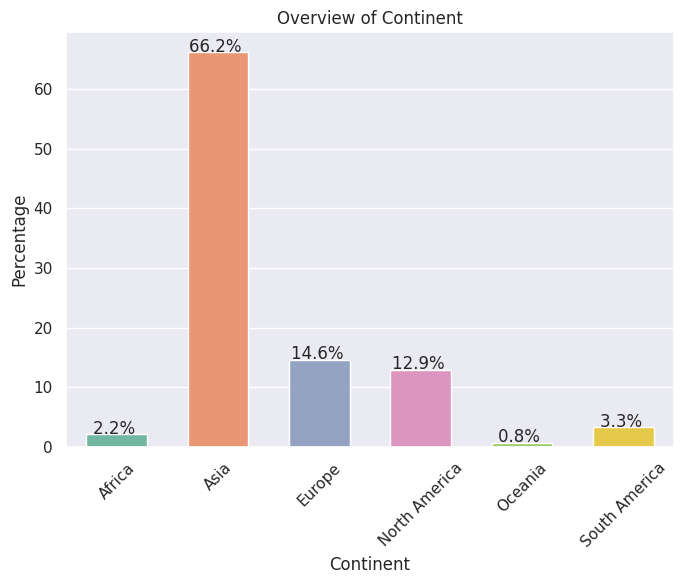

In [331]:
# Bar chart on continent to see number of application on each
plot_bar_chart_percentage(ezdf,'continent','Continent',pellete=pellete)

### Observations:
- Highest number of visa applications are from Asia (66%) followed by Eurupe(14.6%) and North America (12.9%)
- Oceania is least number visa application which is only (0.8%).South Africa and Africa also does not have much visa applications

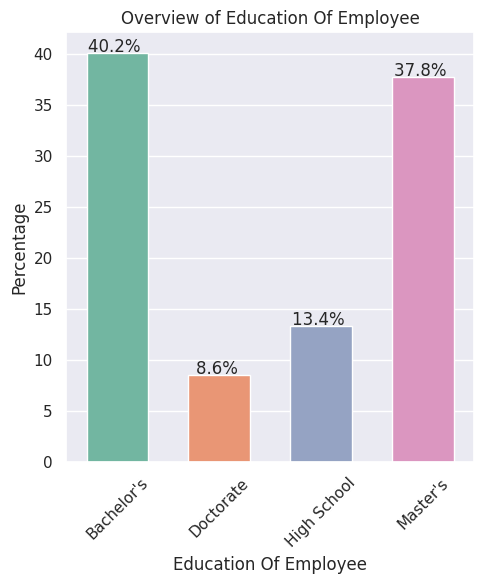

In [332]:
# Bar chart on education_of_employee to check which degree has highest visa application
plot_bar_chart_percentage(ezdf,'education_of_employee','Education Of Employee',pellete=pellete)

### Observations:
The majority of the applicants have a Bachelor's degree (40%) followed by masters degree 37.8% while a small portion of them either have a doctorate (8.6%) or high school degree (13.4%)

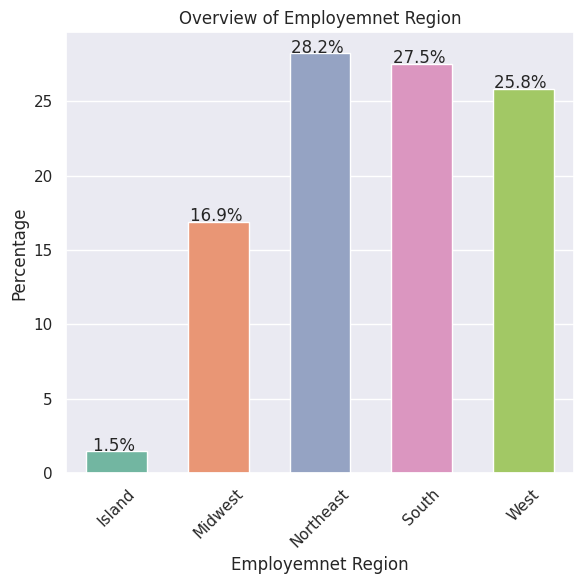

In [333]:
plot_bar_chart_percentage(ezdf,'region_of_employment','Employemnet Region',pellete=pellete)

### Observations:
- Most of the visa applications for Northeast Region(28%) followed by south (27%) and west(25%)
- Island has lowest visa application around 1.5%

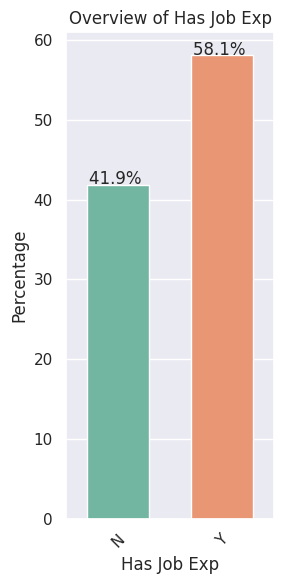

In [334]:
# Bar chart on prior job exp among applicants
plot_bar_chart_percentage(ezdf,'has_job_experience','Has Job Exp',pellete=pellete)

### Observations:
The majority of the applicants have relevant job exp (58.1%) where as 41.9% doesnot have prior exp .It will be intresting to see if this field has any effect on the approval or certified.

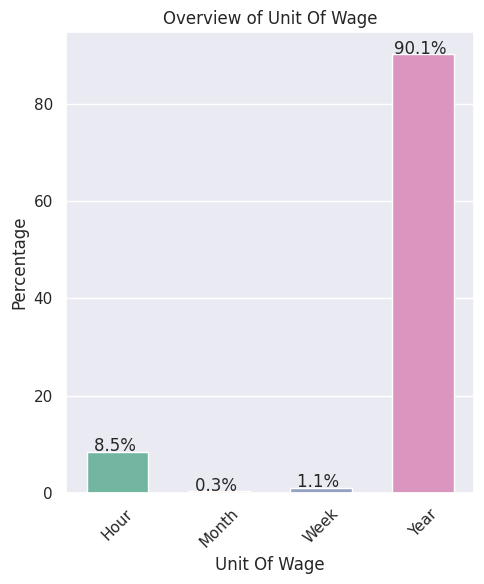

In [335]:
# Bar chart on wage rate of employee
plot_bar_chart_percentage(ezdf,'unit_of_wage','Unit Of Wage',pellete=pellete)

### Observations:
- Most of the applicants are for yearly wage (90.1%) followed by 8.5% who are having hourly wage.
- Weekly monthly has very limited number of applicants.


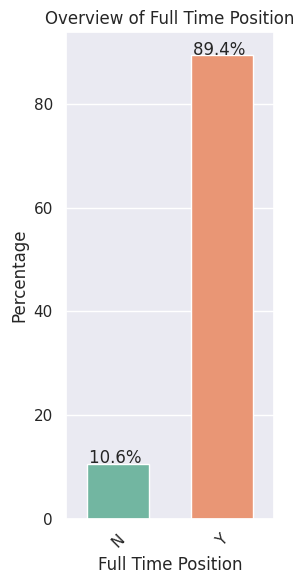

In [336]:
# Bar chart on education_of_employee to check which degree has highest visa application
plot_bar_chart_percentage(ezdf,'full_time_position','Full Time Position',pellete=pellete)

### Observations:
Most of the applicants are applying for full time positions(89%)

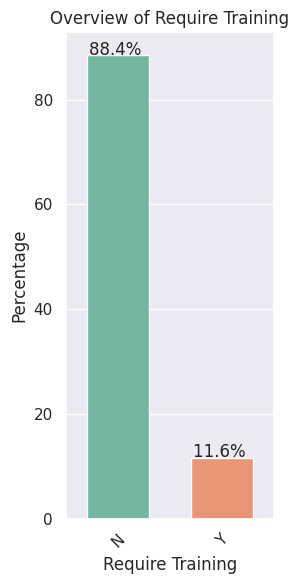

In [337]:
# Bar chart on to see how many applicants applied who requires trainings vs who does not
plot_bar_chart_percentage(ezdf,'requires_job_training','Require Training',pellete=pellete)

### Observations:
Most of the applicant (88%) does not need trainings .We believe thats due to the fact that most of them had prior exp

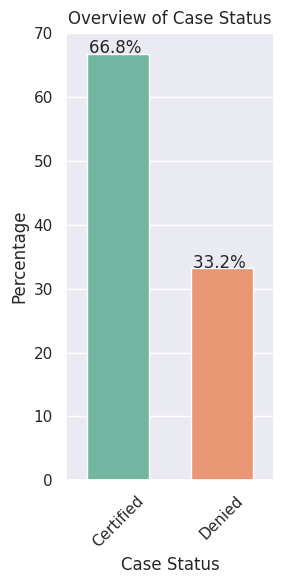

In [338]:
# Bar chart on case staus approval
plot_bar_chart_percentage(ezdf,'case_status','Case Status',pellete=pellete)

### Observations:
Around 66.8% of visa applications are certified and around 33% are denied .We might have to check what parameters are affecting the approval

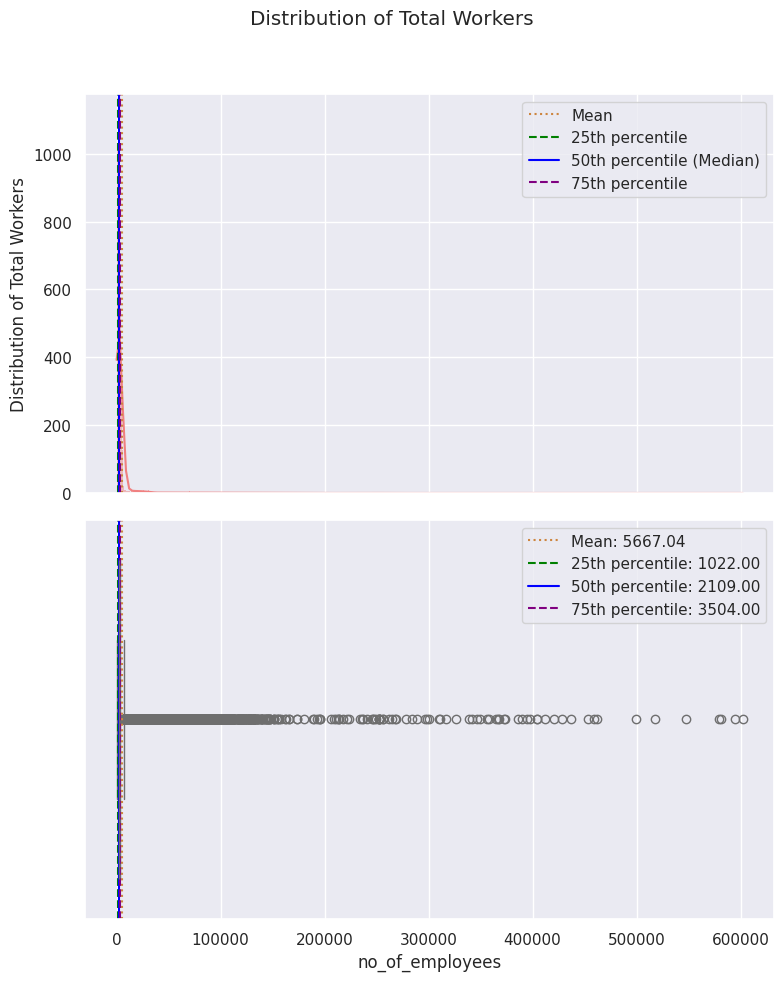

In [339]:
# Histogram and boxplot for distribution of prevailing_wage

plot_histogram_and_boxplot(df=ezdf,column='no_of_employees',xlabel='no_of_employees',ylabel='Distribution of Total Workers',title='Distribution of Total Workers')

### Observations:
- Min no of employees in a orgnisation is 11 who applied for visa .The max value is above .6 million where as 75th percentile is around 3504.
Either there a big orgnaisation who has apllied visa for its employee or the entry is wrong .
-  This field has so many outliers.

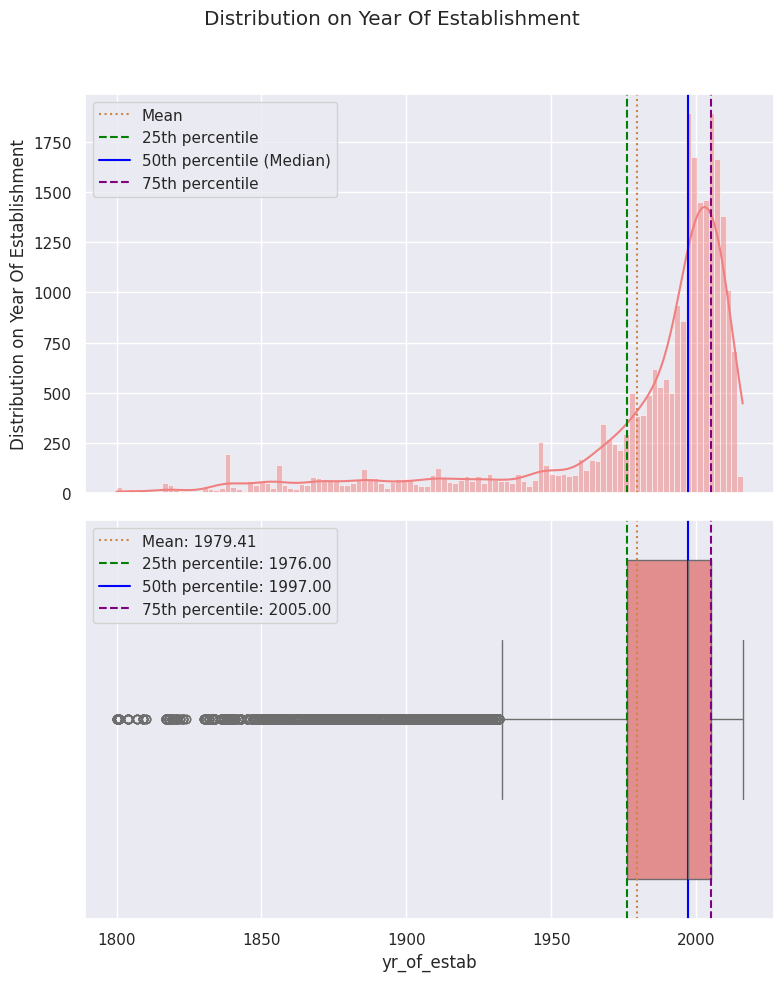

In [340]:
# Histogram and boxplot for distribution of yr_of_estab

plot_histogram_and_boxplot(df=ezdf,column='yr_of_estab',xlabel='yr_of_estab',ylabel='Distribution on Year Of Establishment',title='Distribution on Year Of Establishment')

### Observations:
- The distribution is skewed towards left.Some of the organisation  established before 1800 and max value for this field is 2016

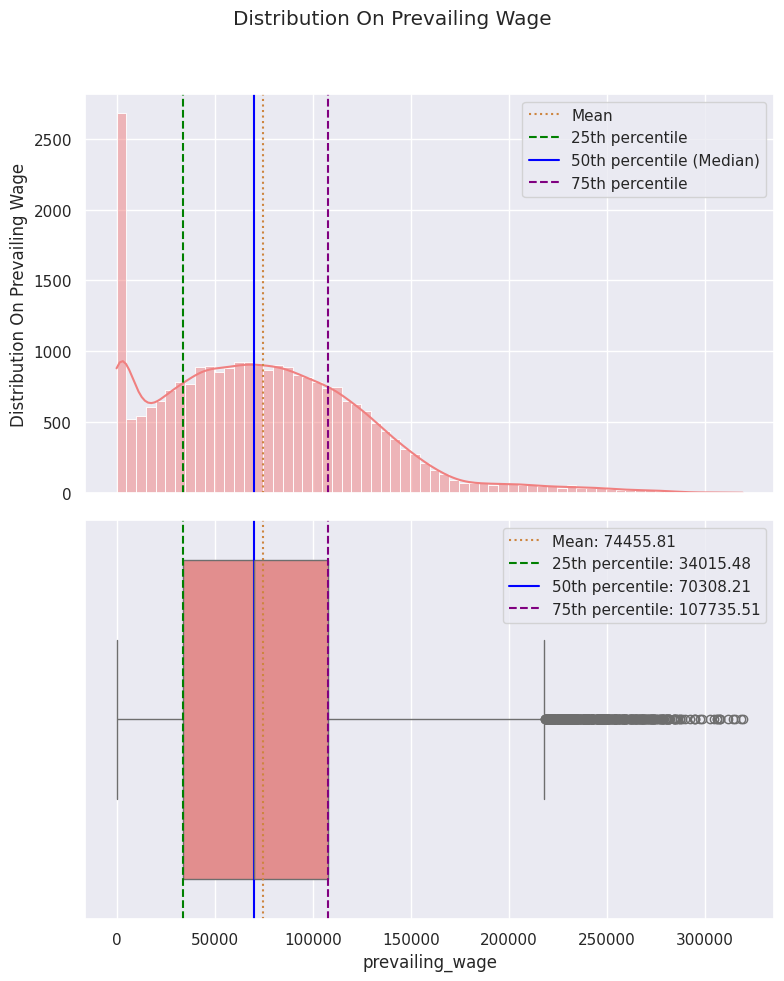

In [341]:
# Histogram and boxplot for distribution of prevailing_wage
plot_histogram_and_boxplot(df=ezdf,column='prevailing_wage',xlabel='prevailing_wage',ylabel='Distribution On Prevailing Wage',title='Distribution On Prevailing Wage')

### Observations:
- The dataset is skewed towards right .There are many outliers for this column as the max wage ranging to 319210.27.Which is quite higher then 75 percentile of the data (107735)
- The mean of this column is around 74455.81

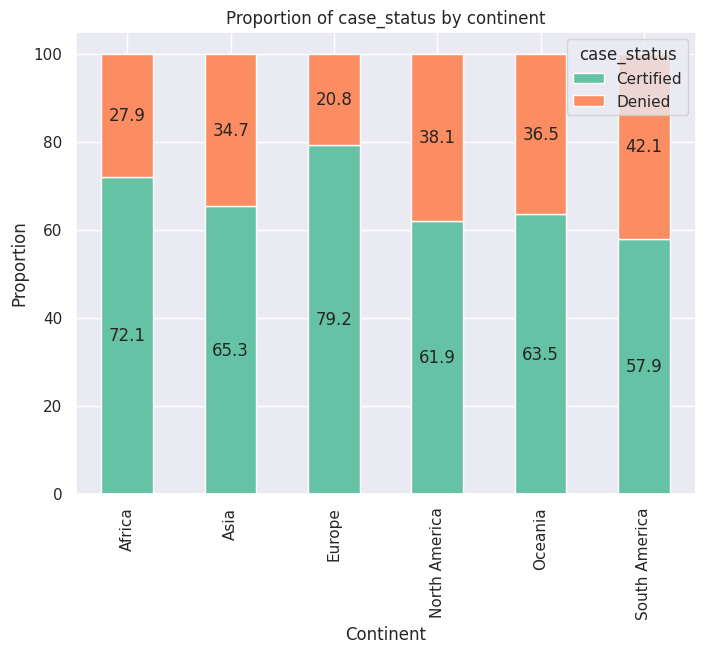

In [342]:
# Plotting Stack bar chart for continent and case stattus
plot_stacked_bar_with_annotations(df=ezdf,x='continent',y='case_status');

### Observations:
**Overall Certification vs. Denial Rates:**

- The proportion of Certified cases varies significantly across continents, ranging from a high of 79.2% in Europe to a low of 57.9% in South America.
Denial rates also fluctuate across continents, with South America having the highest denial rate at 42.1%, while Europe has the lowest at 20.8%.

- Africa has a relatively high certification rate at 72.1%, but it is still lower than Europe.
- Asia shows  65.3% Certified cases and a denial rate of 34.7%.(This is still better considering most of visa applications are from asia around 66%
- North America has a   61.9% Certified and 38.1% Denied, reflecting a higher denial rate compared to Europe and Asia.
- Oceania has a slightly better certification rate than North America, with 63.5% Certified and 36.5% Denied.(But this has least number of visa applications)



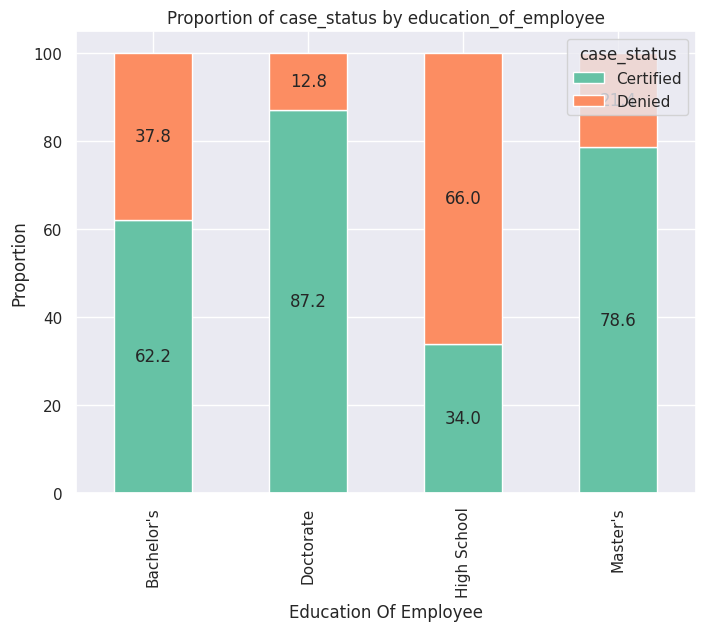

In [343]:
# Stack bar chart vs education of employees
plot_stacked_bar_with_annotations(df=ezdf,x='education_of_employee',y='case_status');

### Observations:
-  Doctorate has highest acceptance(Least applicants)  rate around 87.2% followed by masters and bachelors which has highest applications as well.
- People with high school education has highest rejection rate may be due to lack of skills and may be lack of much opprutunity

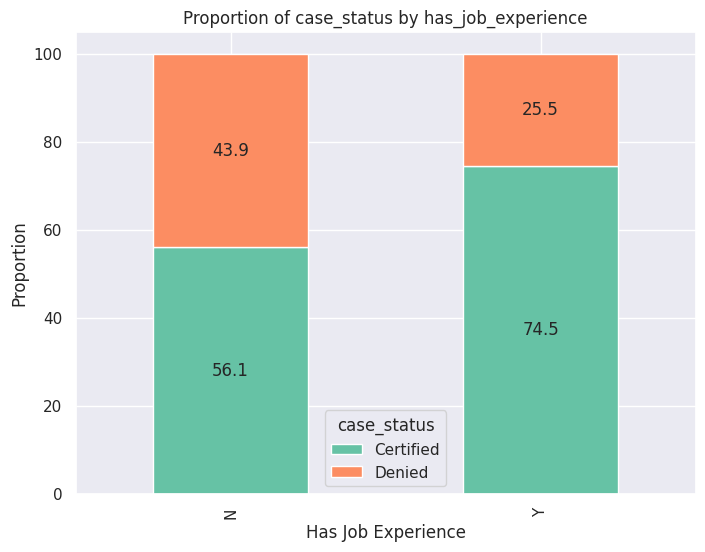

In [344]:
# Stack bar chart has job exp vs certified or not
plot_stacked_bar_with_annotations(df=ezdf,x='has_job_experience',y='case_status');

### Observations:
Applicants with job experience have a ratio of approved to denied applications of 3:1(75%:25%) approx, whereas the ratio for applicants without job experience have around a 5:4(56%:43%) ratio.

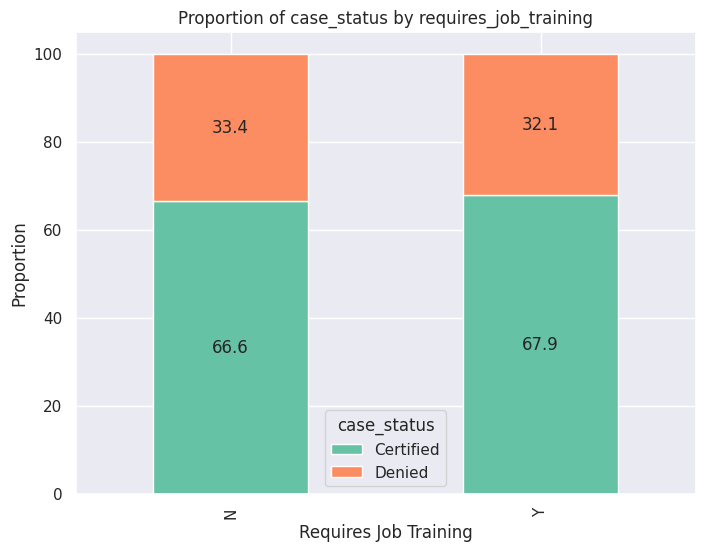

In [345]:
# Stack bar chart to see the propertion on training on job vs case status
plot_stacked_bar_with_annotations(df=ezdf,x='requires_job_training',y='case_status');

### Observations:
- Applicants who does need trainings are having more certified rate then who does not need .But around 88% applicants does not need trainings which is quite big number so we cann not say pople who need job training has higher acceptance rate.

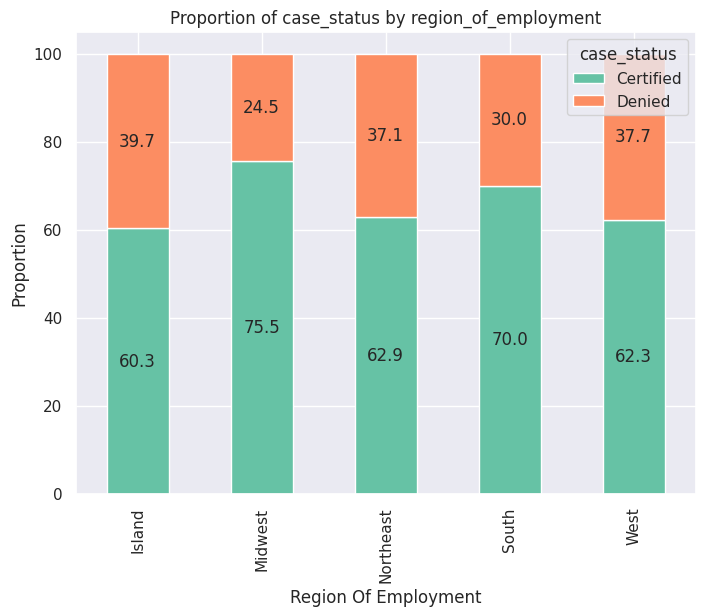

In [346]:
plot_stacked_bar_with_annotations(df=ezdf,x='region_of_employment',y='case_status');

### Observations:
- There are more  case which are certified (76%) in Midwest .Rejection is quite law for this region of employment followed by South(30) and Northeast(37.1)
The above regions have higher applicants as well


---
No of Applicants:

| **Employment Region** | **Percentage** |
|-----------------------|----------------|
| Island                | 1.5%           |
| Midwest               | 16.9%          |
| Northeast             | 28.2%          |
| South                 | 27.5%          |
| West                  | 25.8%          |




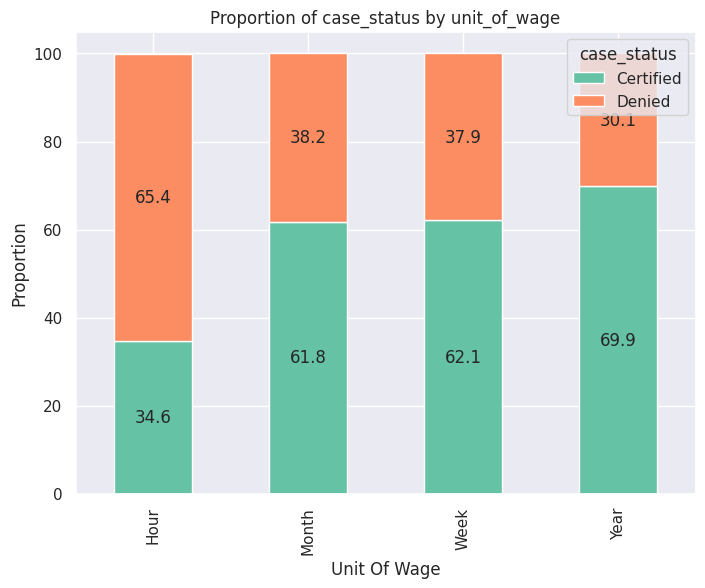

In [347]:
plot_stacked_bar_with_annotations(df=ezdf,x='unit_of_wage',y='case_status');

### Observations:
- Applicants with yearly wage has highest certified rate (70%) followed by month (62%) and week(62%) even most applicants who applied for visa are looking for yearly wage (90%).So there is a tendency to prefer applicants who looking for yearly wage compared to others.
- Approval is quite less for applicants who are looking for hourly wage.We might to check further on the prevailing_wage part of hourly rate are more compared to others.

In [348]:
ezdf.groupby('unit_of_wage')['prevailing_wage'].mean().sort_values(ascending=False)

,prevailing_wage
unit_of_wage,
Month,87592.864045
Week,85606.820515
Year,81228.077133
Hour,414.570513


### Observations:
- It seems like unit of wage per hour is quite high if we consider hourly rate (considering each day 8 hours) if we compared with other unit of wage like month,week and year.
- Mean value for month,week and year are quite similar.


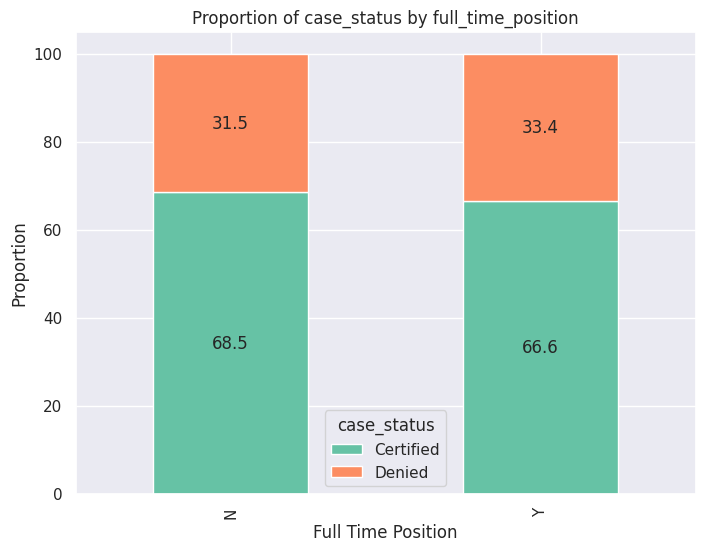

In [349]:
# Stack bar chart full time position vs case status
plot_stacked_bar_with_annotations(df=ezdf,x='full_time_position',y='case_status');

### Observations:
- There is not much difference on visa approval or denied based on position (full time or not)
- There is a little difference we observed though  non full time position has more certified rate around (68%) compared to (66%) for fulltime .But again most of the applicants are applied for full time.


In [350]:
# Partition data in years bin to understand more  if comapany age anything to do with approval
bins = [0, 10, 20, 30, 50, 100,200]  # Years of company age
names = ['0-10', '10-20', '20-30', '30-50', '50-100','100+']
currentyear=2024
ezdf['no_of_year_old']=currentyear-ezdf['yr_of_estab']
ezdf['years']=pd.cut(ezdf['no_of_year_old'], bins=bins, labels=names)

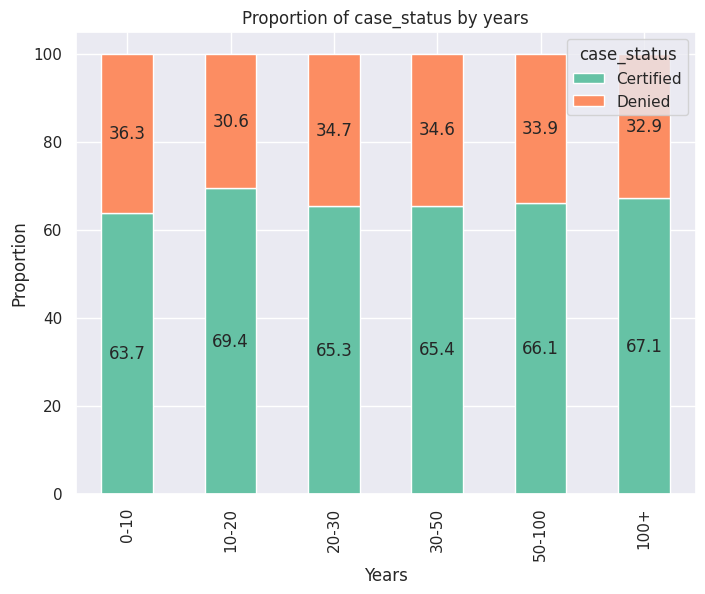

In [351]:
# Stack bar chart after binning those in to differnet bins
plot_stacked_bar_with_annotations(df=ezdf,x='years',y='case_status');

### Observations:
- There is not much relation with respect to company age and visa certified .Most of the approval rate ranging from (64-70).


In [352]:
# Partition data in years bin to understand more  if comapany size anything to do with approval

bins = [0,200,500,1000,10000,45000]
names = ['0-200','200-500','500-1000','1000-10000','10000+']
ezdf['size_of_cmny']=pd.cut(ezdf['no_of_employees'],bins=bins,labels=names)
ezdf['size_of_cmny'].value_counts( normalize=False)

,count
size_of_cmny,
1000-10000,17803
500-1000,3140
200-500,1882
0-200,1186
10000+,828


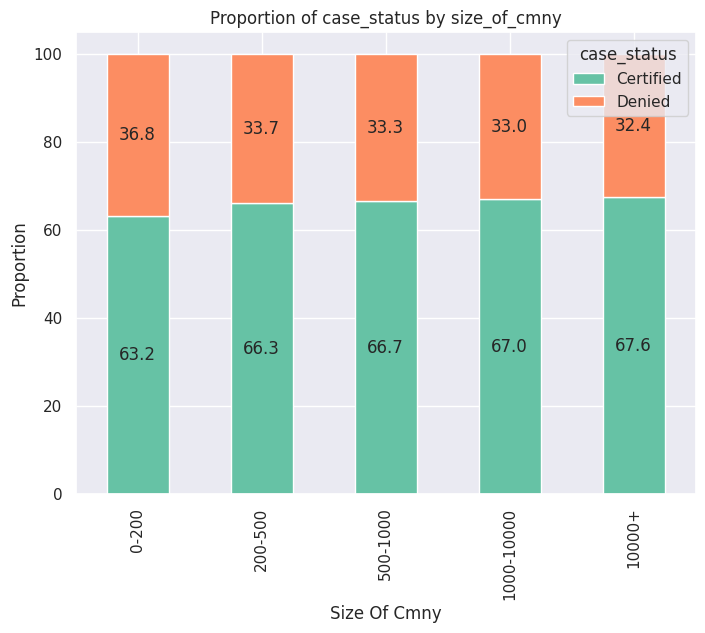

In [353]:
# stack bar chart size of organisation vs visa certified or not
plot_stacked_bar_with_annotations(df=ezdf,x='size_of_cmny',y='case_status');

### Observations:
- There is not much relation with respect to company size and visa certified .Most of the approval rate ranging from (63-67) approx.


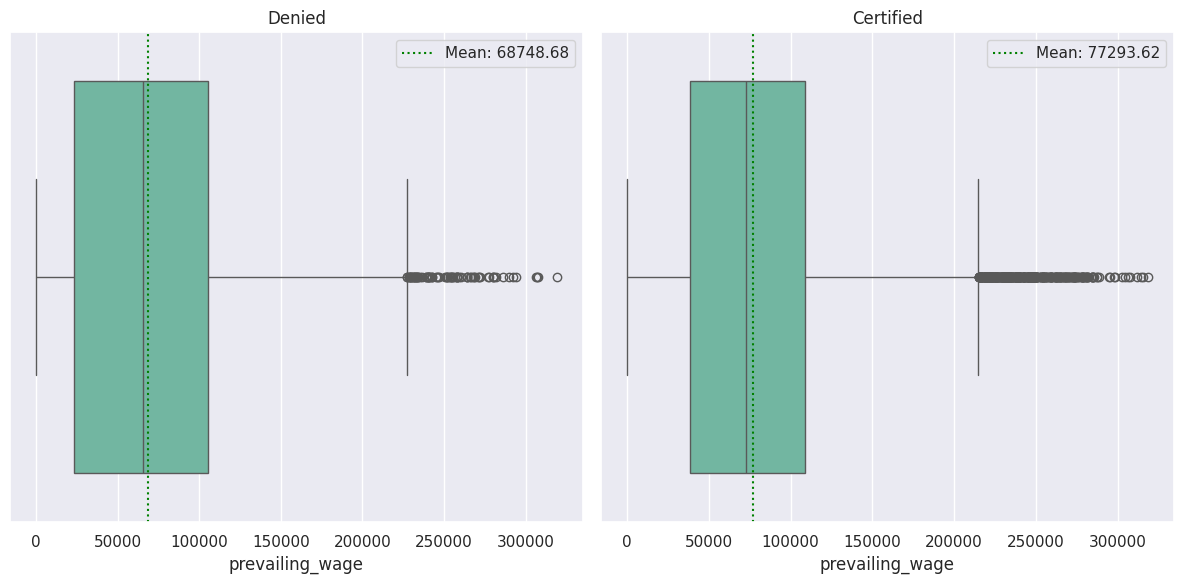

In [354]:
# Box plot to check the distribution of wage  for both denied and certified
plot_box_plot_side_by_side(df=ezdf,x='prevailing_wage',xlabel='prevailing_wage',category_col='case_status',color=colors[0]);

### Observations:
Applicants who are certified or got their visa approved have higher mean prevailing wage

In [355]:
ezdf.groupby('region_of_employment')['prevailing_wage'].mean()

,prevailing_wage
region_of_employment,
Island,91712.750760
Midwest,91696.741794
Northeast,67872.662819
South,74040.545216
West,69832.628698


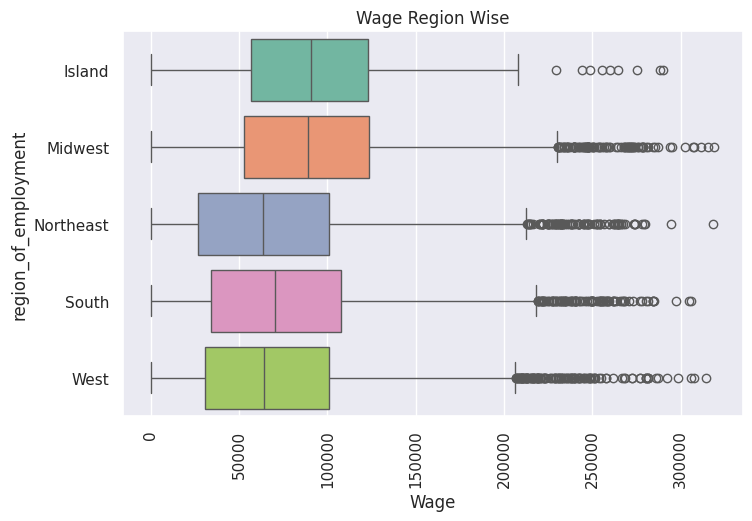

In [356]:
plot_boxplot(df=ezdf,x_col='prevailing_wage',y_col='region_of_employment',hue_col='region_of_employment',title='Wage Region Wise',xlabel='Wage');

### Observations:
- Midwest and island have higher wage (92000 approx) compared to other region.
- Northeast has lowest wage (68000 approx) compared to other region.



In [357]:
ezdf.groupby('continent')['prevailing_wage'].mean()

,prevailing_wage
continent,
Africa,77425.923450
Asia,79543.021780
Europe,59842.925899
North America,68066.319257
Oceania,75994.276719
South America,60209.575314


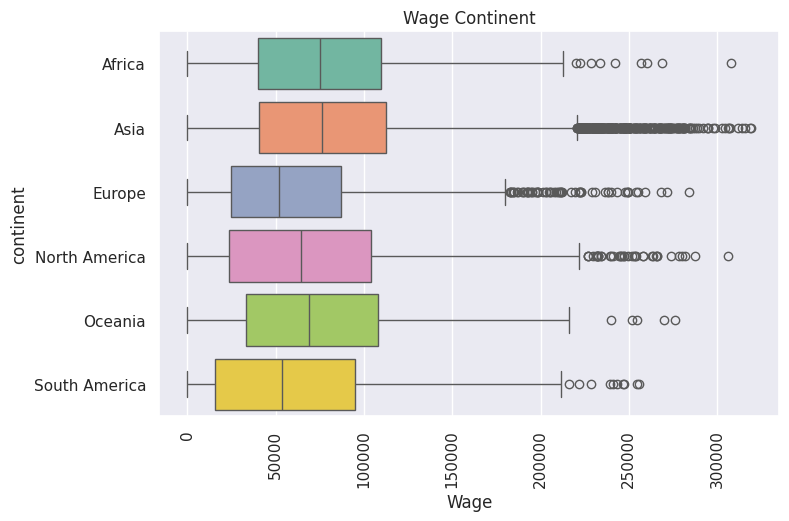

In [358]:
plot_boxplot(df=ezdf,x_col='prevailing_wage',y_col='continent',hue_col='continent',title='Wage Continent',xlabel='Wage');

### Observations:
- Africa and Asia applicants mean prevailing_wage is higher then other regions

In [359]:
# Dropping columns which we had created for our analysis
ezdf.drop(['no_of_year_old','years','size_of_cmny'],axis=1,inplace=True)

                 no_of_employees  yr_of_estab  prevailing_wage
no_of_employees         1.000000    -0.017770        -0.009523
yr_of_estab            -0.017770     1.000000         0.012342
prevailing_wage        -0.009523     0.012342         1.000000


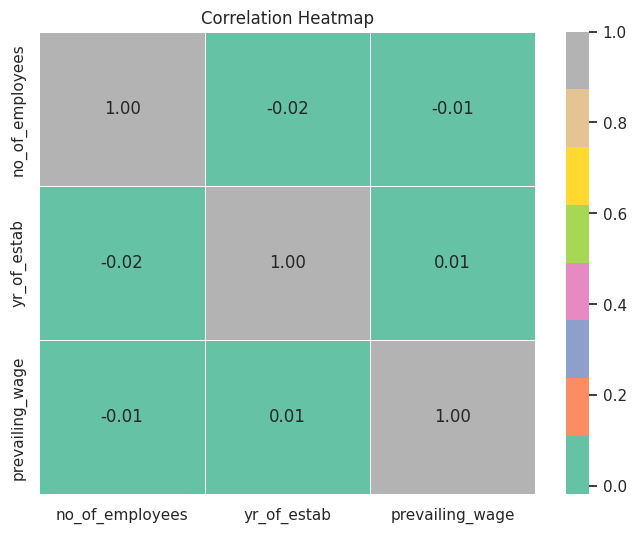

In [360]:
# Select only the numerical columns
numerical_columns = ezdf[ezdf.select_dtypes(exclude = 'category').columns[1:]]

# Find the correlation between the numerical columns
correlation_matrix = numerical_columns.corr()

# Print the correlation matrix
print(correlation_matrix)
# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=pellete, fmt=".2f", linewidths=0.5)

# Set heatmap title
plt.title("Correlation Heatmap")

# Show the heatmap
plt.show()

### Observations:
There is no corelation between differnet numerical features

### EDA QUESTIONS

#### Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

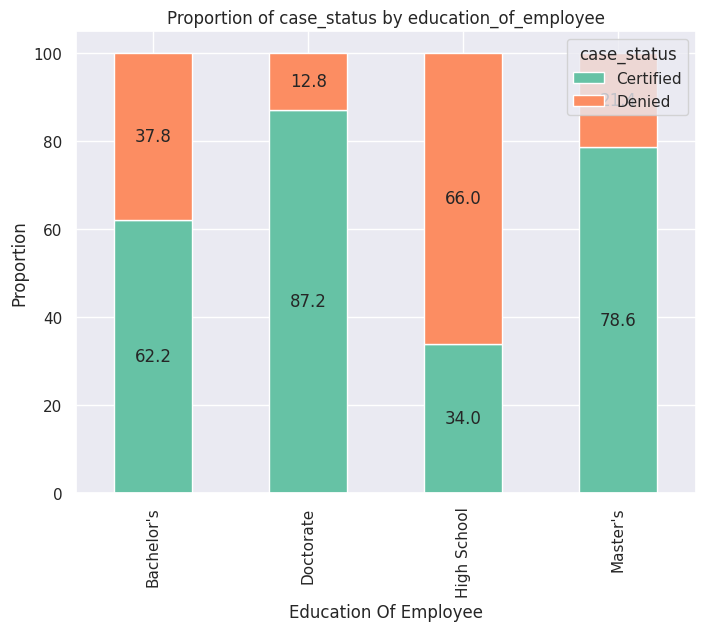

In [361]:
# Stack bar chart vs education of employees
plot_stacked_bar_with_annotations(df=ezdf,x='education_of_employee',y='case_status');

In [362]:
df=ezdf.groupby('education_of_employee')['case_status'].value_counts()
df

education_of_employee  case_status
Bachelor's             Certified      6367
                       Denied         3867
Doctorate              Certified      1912
                       Denied          280
High School            Denied         2256
                       Certified      1164
Master's               Certified      7575
                       Denied         2059
Name: count, dtype: int64

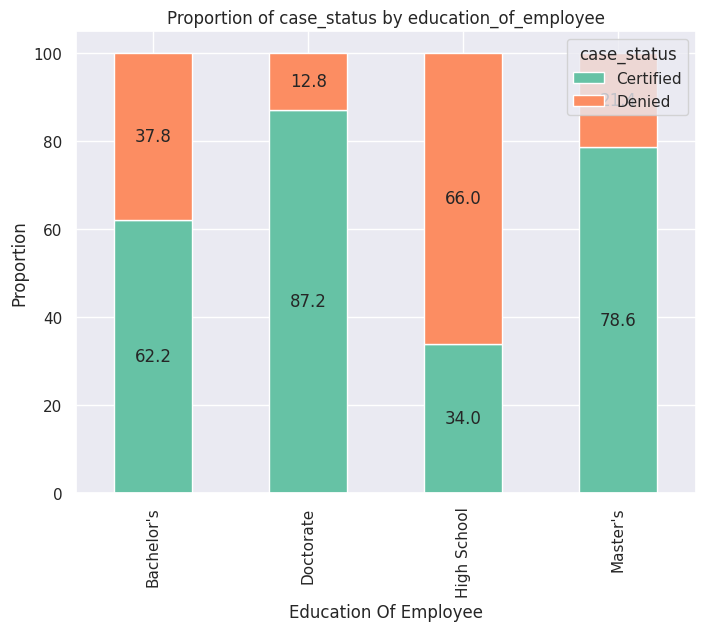

In [363]:
# Stack bar chart vs education of employees
plot_stacked_bar_with_annotations(df=ezdf,x='education_of_employee',y='case_status');

### Observations:
As the bar plot  aboves shows, the propertion of applications being certified versus denied increases considerably as an applicant's highest level of education achieved increases.
- Doctorate has highest certified rate and highschool has lowest approval





#### How does the visa status vary across different continents?


In [364]:
#group data by continent and count the numbers of each case_status for each category
ezdf.groupby('continent')['case_status'].value_counts()


continent      case_status
Africa         Certified        397
               Denied           154
Asia           Certified      11012
               Denied          5849
Europe         Certified       2957
               Denied           775
North America  Certified       2037
               Denied          1255
Oceania        Certified        122
               Denied            70
South America  Certified        493
               Denied           359
Name: count, dtype: int64

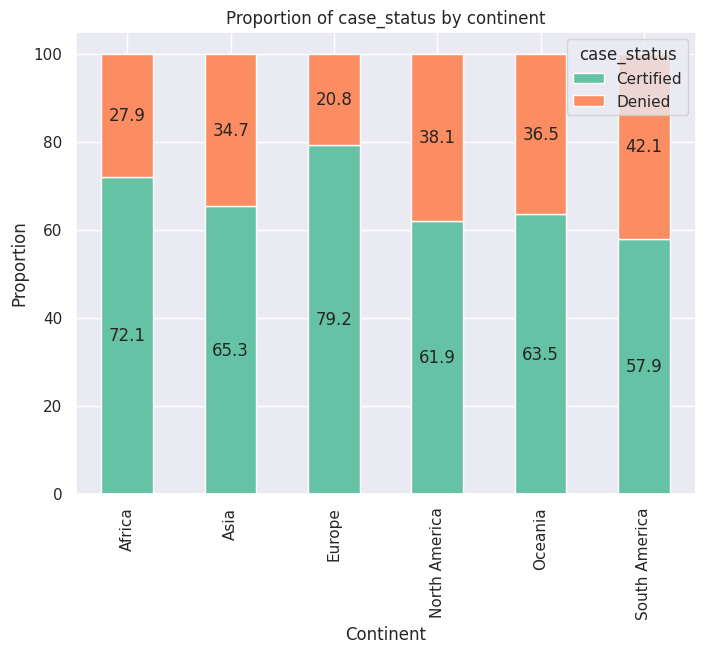

In [365]:
# Plotting Stack bar chart for continent and case stattus
plot_stacked_bar_with_annotations(df=ezdf,x='continent',y='case_status');

### Observations:
**Overall Certification vs. Denial Rates:**
- The proportion of Certified cases varies significantly across continents, ranging from a high of 79.2% in Europe to a low of 57.9% in South America. Denial rates also fluctuate across continents, with South America having the highest denial rate at 42.1%, while Europe has the lowest at 20.8%.

- Africa has a relatively high certification rate at 72.1%, but it is still lower than Europe.

- Asia shows 65.3% Certified cases and a denial rate of 34.7%.(This is still better considering most of visa applications are from asia around 66%

- North America has a 61.9% Certified and 38.1% Denied, reflecting a higher denial rate compared to Europe and Asia.

- Oceania has a slightly better certification rate than North America, with 63.5% Certified and 36.5% Denied.(But this has least number of visa applications)


#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

In [366]:
#group data by has_job_experience and count the numbers of each case_status
ezdf.groupby('has_job_experience')['case_status'].value_counts()

has_job_experience  case_status
N                   Certified       5994
                    Denied          4684
Y                   Certified      11024
                    Denied          3778
Name: count, dtype: int64

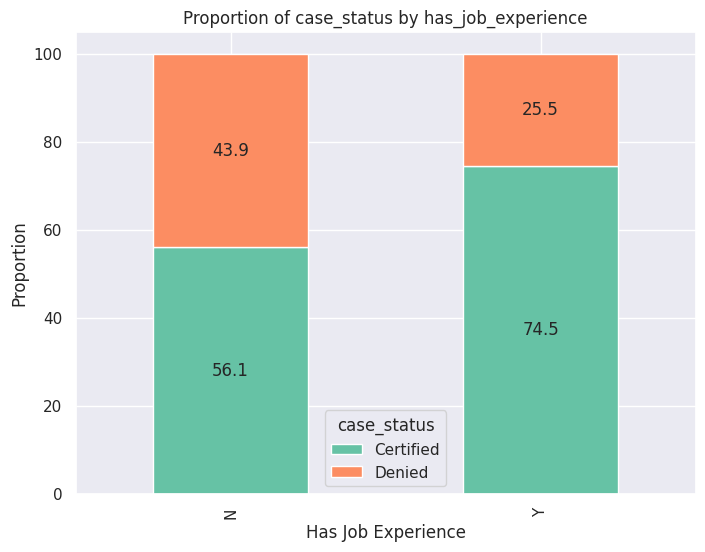

In [367]:
# Stack bar chart has job exp vs certified or not
plot_stacked_bar_with_annotations(df=ezdf,x='has_job_experience',y='case_status');

### Observations:
Applicants with job experience have a ratio of approved to denied applications of 3:1(75%:25%) approx, whereas the ratio for applicants without job experience have around a 5:4(56%:43%) ratio.

#### In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

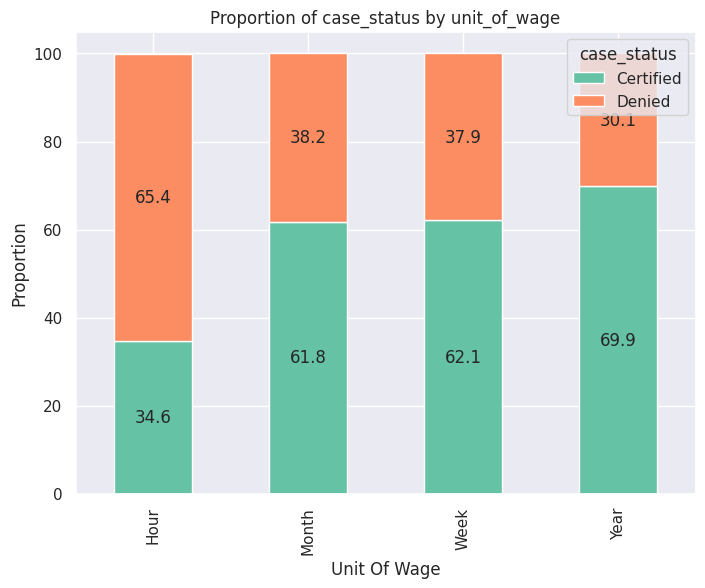

In [368]:
# plot bar chart for unit of wage and visa approved or denied
plot_stacked_bar_with_annotations(df=ezdf,x='unit_of_wage',y='case_status');

### Observations:
- Applicants with yearly wage has highest certified rate (70%) followed by month (62%) and week(62%) even most applicants who applied for visa are looking for yearly wage (90%).So there is a tendency to prefer applicants who looking for yearly wage compared to others.
- Approval is quite less for applicants who are looking for hourly wage.We have covered in EDA how hourly rate is more compared to others.

#### The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

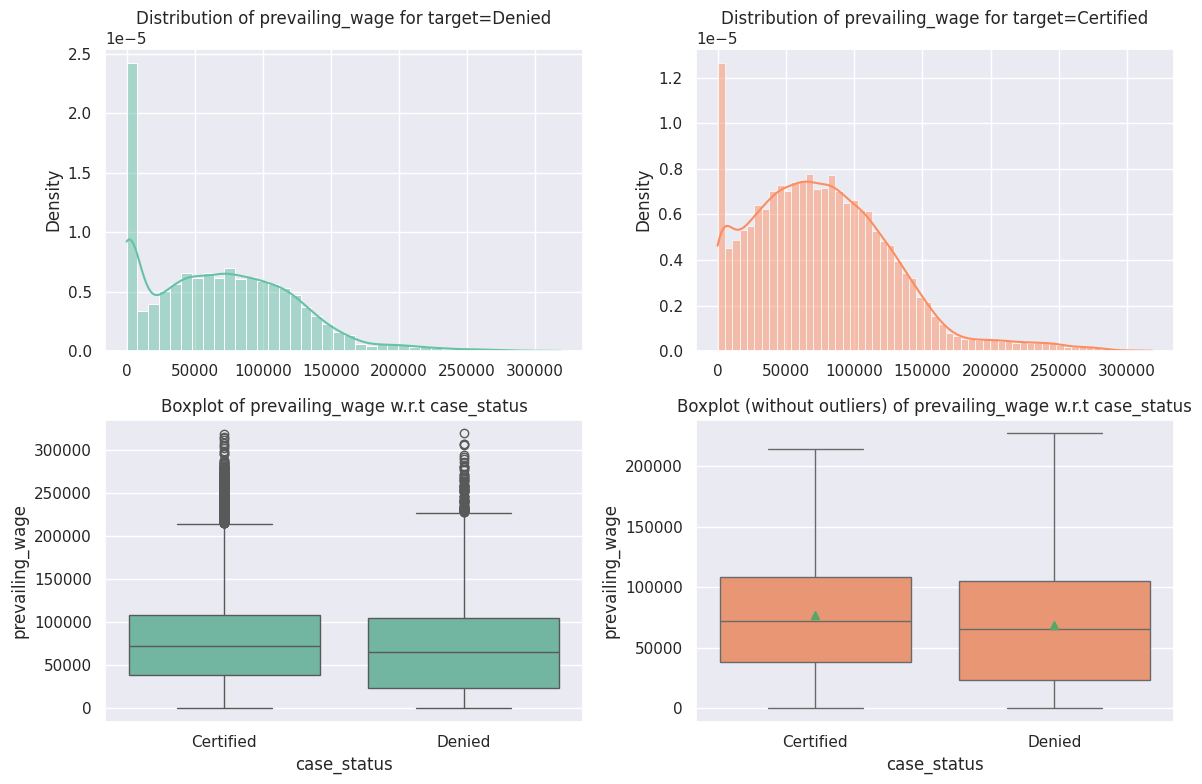

In [369]:
# Hostogram with box plot to show prevaling wage w.r.t visa status
distribution_plot_wrt_target(data=ezdf,predictor='prevailing_wage',target='case_status',showhistogram=True,figsize=(12,8))

### Observations:
The prevailing_wage (median and mean) is little bit higher for certified case .We have covered detailed analsyis in genral EDA with region_of_employment and continent aswell.


### Data Preparation For Modeling


### Outlier Detection and Treatment

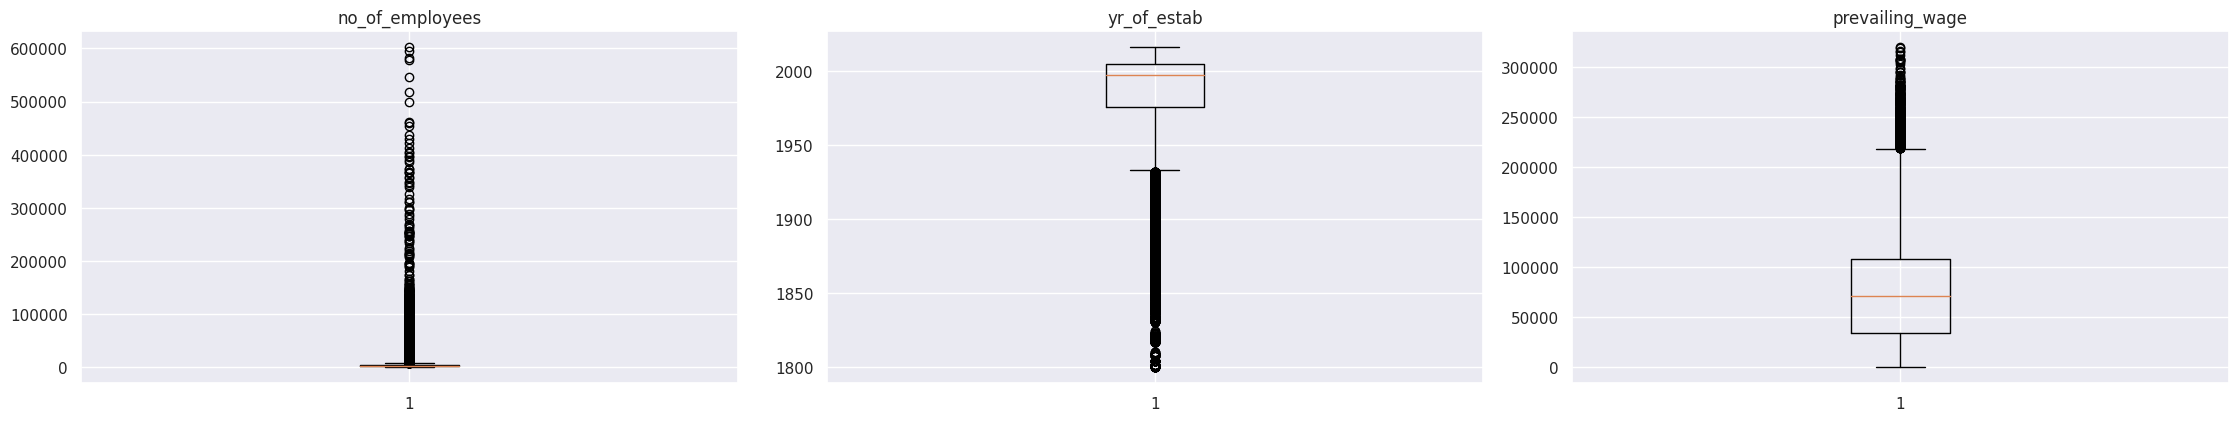

In [370]:
numerical_col = ezdf.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(30, 20))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(ezdf[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Observation:
Outliers present for no_of_employess,yr_of_estab and prevailing_wage in the data, but we did not treat as they are considered as proper values


## Data Processing

#### We will make the case status field as integer with certified as 1 and declined as 0 before creating any model

In [371]:
ezdf['case_status']=ezdf.case_status.apply(lambda x: 1 if x=='Certified' else 0)

#### Remove nagative no of employees as it does not make any sense

In [372]:
# Take absolute of the no of employees to remove nagative
ezdf['no_of_employees']=ezdf['no_of_employees'].apply(lambda x: abs(x))

In [373]:
# Validating
ezdf[ezdf['no_of_employees'] < 0].count()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


In [374]:
# Validating
print(pd.concat([ez_df,ezdf],axis=1)['case_status'].head(5))


  case_status case_status
0      Denied           0
1   Certified           1
2      Denied           0
3      Denied           0
4   Certified           1


In [375]:
# Dropping case_id
ezdf.drop('case_id',inplace=True,axis=1)

### Model Prediction Challenges:

- **False Negative**: The model predicts that an applicant will not be approved for a visa, but in reality, the applicant is eligible and gets approved.
  - **Impact**: This can lead to missed opportunities for deserving applicants, resulting in dissatisfaction and potential reputational damage for Easy Visa.
- **False Positive**: The model predicts that an applicant will be approved for a visa, but in reality, the applicant is not eligible.

   - **Impact**: This can result in the approval of unqualified applicants, which may compromise security and  lead to further complications in the visa process.This even has impact on overall economy as U.S companies canot fill creatical positions.


---


   - Both types of errors are significant in the context of visa approvals, and minimizing them is crucial for maintaining the integrity of the visa process and ensuring fair treatment of applicants.
   - We should either  go for optimising **F1** score which is harmonic mean of recall and precession or we should try to increase the **Precession** by minimising **FP** as approving visa to someone who does not really a deserving applicants subject to security risk (If Govt want that)
   - Preffered way is to increase **F1** Score


We divide the dataset in test and training set

In [376]:
X=ezdf.drop('case_status',axis=1) # Features
y=ezdf['case_status'] # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [377]:
print_dataset_shapes_and_class_distribution(X_train, X_test, y_train, y_test)

Shape of Training set: (17836, 10)
Shape of Test set: (7644, 10)

Percentage of classes in Training set:
case_status
1    0.663602
0    0.336398
Name: proportion, dtype: float64

Percentage of classes in Test set:
case_status
1    0.677917
0    0.322083
Name: proportion, dtype: float64


We are going to encode all the labels with the value between 0 and n_classes-1.
For implementing this, we are going to use LabelEncoder of scikit learn library and even OneHotencoder fopr fields like continent,region_of_employment,units_of_wage  which are not ordinal fields.Fileds like education_of_employee and other binary type fields are suitable for LabelEncoder


---
#### We are doing encoding seperately for train and test data set .This is to avoid Data Leakage.Data leakage occurs when information from the test set influences the training process, which can lead to overly optimistic performance estimates.


In [378]:
# Encode variables with label encoing where ever justified and use one hot encoding where ever required

le=LabelEncoder()

X_train['education_of_employee']=le.fit_transform(X_train['education_of_employee'])
X_test['education_of_employee']=le.transform(X_test['education_of_employee'])

X_train['has_job_experience']=le.fit_transform(X_train['has_job_experience'])
X_test['has_job_experience']=le.transform(X_test['has_job_experience'])

X_train['requires_job_training']=le.fit_transform(X_train['requires_job_training'])
X_test['requires_job_training']=le.transform(X_test['requires_job_training'])

X_train['full_time_position']=le.fit_transform(X_train['full_time_position'])
X_test['full_time_position']=le.transform(X_test['full_time_position'])

# Apply one-hot encoding on training and test data
X_train = pd.get_dummies(X_train, columns=['continent', 'region_of_employment', 'unit_of_wage'])
X_test = pd.get_dummies(X_test, columns=['continent', 'region_of_employment', 'unit_of_wage'])

# Align columns in test set with train set (in case some categories are missing)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Title for Test and Train
cs_training="Confusion Matrix For Training"
cs_testing="Confusion Matrix For Testing"


### Decision Tree Model Without Prunning

In [379]:
# Create Decision Tree Model with entropy without any prunning
treemodel=DecisionTreeClassifier(criterion='entropy',random_state=1)
# treemodel.fit(X_train,y_train)
# Measure training time using timeit
training_time_dt_default = timeit.timeit(lambda:train_model(treemodel,Xtrain=X_train,ytrain=y_train), number=1)

In [387]:
# Printing both train and test score
printmodelscoreandtrainTime(model=treemodel,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,training_time=training_time_dt_default)

Training Score 1.0
Testing Score 0.663788592360021
Training Time 1.0835840390000158


### Observations:
We see the model overfitted with training data

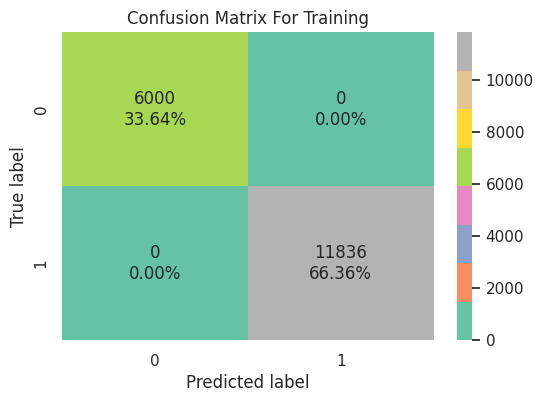

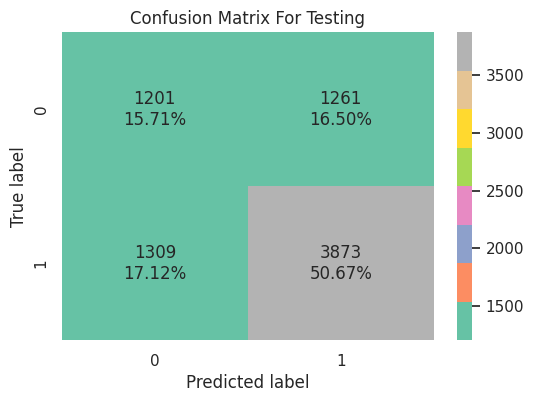

In [381]:
# Draw Confusion matrix for test and train data
confusion_matrix_sklearn(treemodel, X_train, y_train,cs_training)
confusion_matrix_sklearn(treemodel, X_test, y_test,cs_testing)

In [382]:
# Print Precession f1 csore and recall
dec_tree_performance_default=model_performance_classification_sklearn(model=treemodel, predictors=X_test, target=y_test)
dec_tree_performance_default

,Accuracy,Recall,Precision,F1
0,0.663789,0.747395,0.754383,0.750872


### Observations:
- It seems with training data we have overfitted due to no prunning.
- Plotting tree below we get a very complex model
- Recall ,Precesion,F1 score is at 75% for test data .
- Accuracy of model is below 70%

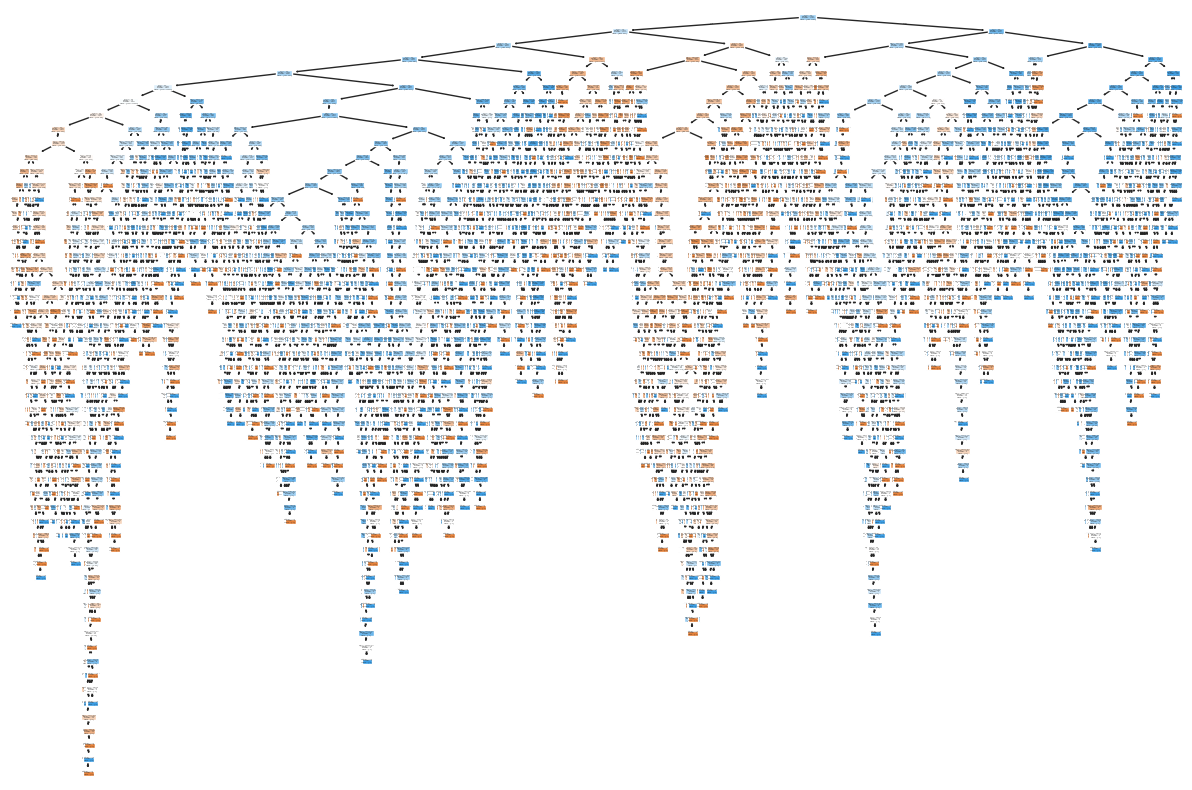

In [383]:
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)
plt.show()

### Obsevations:
- Complex model is generated due to no prunning with overfitting

### Decision Tree with Post Prunning and max depth = 3

In [388]:
## Postpruning
treemodel_pruned=DecisionTreeClassifier(max_depth=3)
training_time_dt_pruned = timeit.timeit(lambda:train_model(treemodel_pruned,Xtrain=X_train,ytrain=y_train), number=1)
# Printing both train and test score
printmodelscoreandtrainTime(model=treemodel_pruned,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,training_time=training_time_dt_pruned)

Training Score 0.7294797039694999
Testing Score 0.7380952380952381
Training Time 0.0999053659998026


- We reduced the overfitting and accuracy score is improved.
- Training Time is significantly lesser then the  default decision  tree as it went on to overfit the data

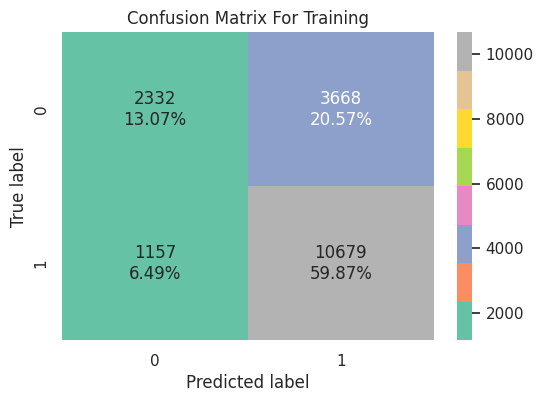

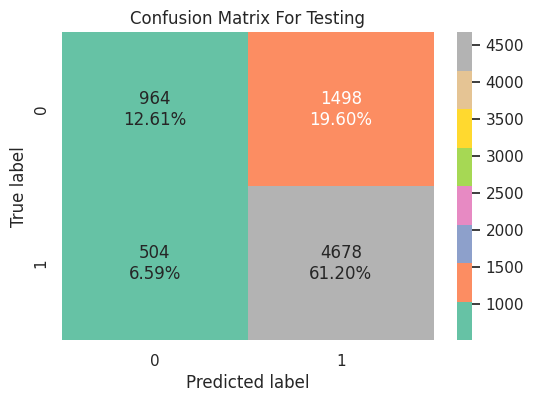

In [390]:
# Show Confusion Matrix on test data
confusion_matrix_sklearn(treemodel_pruned, X_train, y_train,cs_training)
confusion_matrix_sklearn(treemodel_pruned, X_test, y_test,cs_testing)

### Observation: (On Test Set)
- We have reduced the **FN** from 17% to 6.59%(Applicant was approved and the model predicted denial : False Negative (observed=1,predicted=0)
-  **FP** is increased (observed=0,predicted=1) by prunning the tree

In [391]:
# Print Precession f1 csore and recall
dec_tree_performance__prun_default=model_performance_classification_sklearn(model=treemodel_pruned, predictors=X_test, target=y_test)
dec_tree_performance__prun_default

,Accuracy,Recall,Precision,F1
0,0.738095,0.90274,0.757448,0.823737


### Observations:
- We have reduced the overfitting here with training data
- **F1**  score is around  82%(Good) approx.
- **Recall**  score is around  90% approx(This is quite Good).
- **Precision** is at 75 % which is same as Decision Tree non prune
-  **Accuracy** with test data is improved with post pruning 73%


### Decision Tree Grid Value Search with Cv=3 (for validating 3 times)


In [393]:
## Preprunning
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']

}
# Create Tree model with decision tree
treemodel_preprun=DecisionTreeClassifier()
cv=GridSearchCV(treemodel_preprun,param_grid=parameter,cv=3,scoring='f1')

In [401]:
# Fit with training set
cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='f1')

In [403]:
best_params=cv.best_params_
print(best_params)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'splitter': 'best'}


### Observations:
After performing hyperparameter tuning using `GridSearchCV`, we found the best parameters for our Decision Tree Classifier as follows:

- **Criterion**: `'entropy'`  
  This criterion is used to measure the quality of a split in the decision tree. It uses information gain based on entropy, helping to determine the best possible splits for the tree.

- **Max Depth**: `5`  
  This limits the maximum depth of the decision tree. A maximum depth of 5 helps to control overfitting by restricting the model's complexity.

- **Max Features**: `'log2'`  
  This parameter specifies the number of features to consider when looking for the best split. By using `'log2'`, the model will only consider a logarithmic number of features at each split, which can help reduce overfitting and improve performance.

- **Splitter**: `'best'`  
  This parameter indicates the strategy used to choose the split at each node. Setting it to `'best'` means that the model will always choose the best possible split among the available features.

These optimal parameters will enhance the performance of our Decision Tree Classifier, allowing it to generalize better on unseen data.


In [408]:
# Create Decesion tree with those Hyper parameter and fit on training set
best_model = DecisionTreeClassifier(**best_params)
training_time_dt_tuned = timeit.timeit(lambda:train_model(best_model,Xtrain=X_train,ytrain=y_train), number=1)
printmodelscoreandtrainTime(model=best_model,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,training_time=training_time_dt_tuned)

Training Score 0.7103050011213277
Testing Score 0.717294610151753
Training Time 0.032814844000313315


### Observations:
- Score decreased a bit compared post pruned model
- We have reduced the overfitting

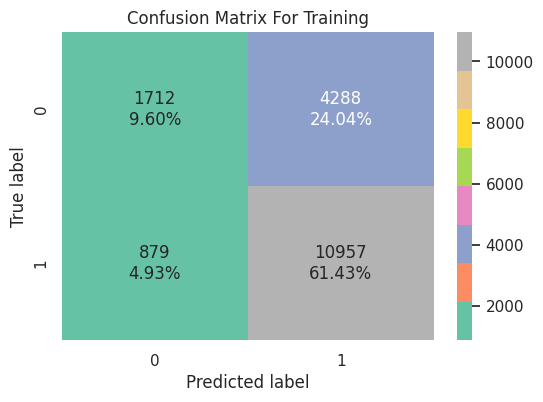

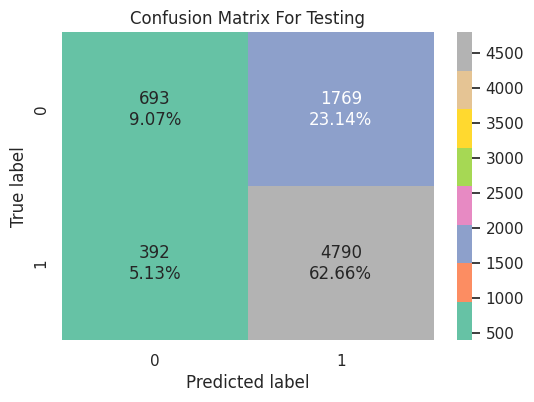

In [409]:
# Show Confusion Matrix on test data and training
confusion_matrix_sklearn(best_model, X_train, y_train,cs_training)
confusion_matrix_sklearn(best_model, X_test, y_test,cs_testing)

### Observations:
- This model can predict more certified case compared to previous model**(TP)**
- This model has more **FP** compared to previous models
- **FN** are reduced a bit

In [410]:
# Print Precession f1 score and recall
dec_tree_performance__pre_prun_default=model_performance_classification_sklearn(model=best_model, predictors=X_test, target=y_test)
dec_tree_performance__pre_prun_default

,Accuracy,Recall,Precision,F1
0,0.717295,0.924354,0.730294,0.815944


### Observations:
- With Grid Search CV the **F1** score is now at 81%
- With Grid Search CV the **Recall**  is now at 92% which is improved from post prunning model.
- Acuracy of the model is dropped from post pruned model

In [411]:
# get features imprtance from the model
importances=treemodel_pruned.feature_importances_
# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})
# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the important parameters
print("Important Features from Decision Tree:")
print(feature_importance_df)

Important Features from Decision Tree:
                           Feature  Importance
0            education_of_employee    0.570679
18               unit_of_wage_Hour    0.293074
1               has_job_experience    0.136247
20               unit_of_wage_Week    0.000000
19              unit_of_wage_Month    0.000000
17       region_of_employment_West    0.000000
16      region_of_employment_South    0.000000
15  region_of_employment_Northeast    0.000000
14    region_of_employment_Midwest    0.000000
13     region_of_employment_Island    0.000000
12         continent_South America    0.000000
11               continent_Oceania    0.000000
10         continent_North America    0.000000
9                 continent_Europe    0.000000
8                   continent_Asia    0.000000
7                 continent_Africa    0.000000
6               full_time_position    0.000000
5                  prevailing_wage    0.000000
4                      yr_of_estab    0.000000
3                  no

### Observations:
Important Features from Decision Tree

After evaluating the feature importances from our pruned Decision Tree model, we found the following features to have non-zero importance in predicting the outcome:

| Feature                      | Importance |
|------------------------------|------------|
| education_of_employee        | 0.570679   |
| unit_of_wage_Hour           | 0.293074   |
| has_job_experience           | 0.136247   |

These features significantly contribute to the model's decision-making process. The majority of the other features were found to have zero importance, indicating they do not contribute to improving the model's predictions.


### Bagging Classifier

In [421]:
# Default bagging classifier and fit
bagging = BaggingClassifier(random_state=1)
training_time_bagging = timeit.timeit(lambda:train_model(bagging,Xtrain=X_train,ytrain=y_train), number=1)
printmodelscoreandtrainTime(model=bagging,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,training_time=training_time_bagging)

Training Score 0.9844696120206324
Testing Score 0.6981946624803768
Training Time 1.3784203249997518


### Observations:
- Default Bagging seems to overfit training set
- Time taken to train the model is highest among other models


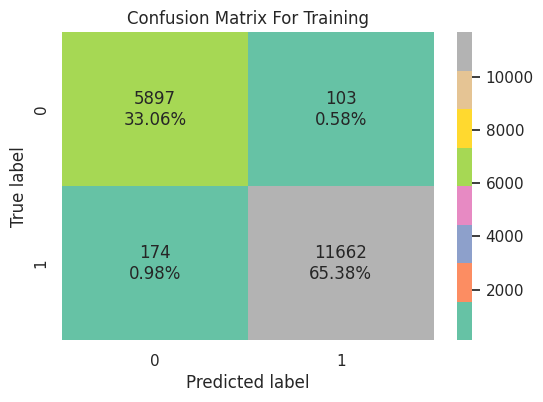

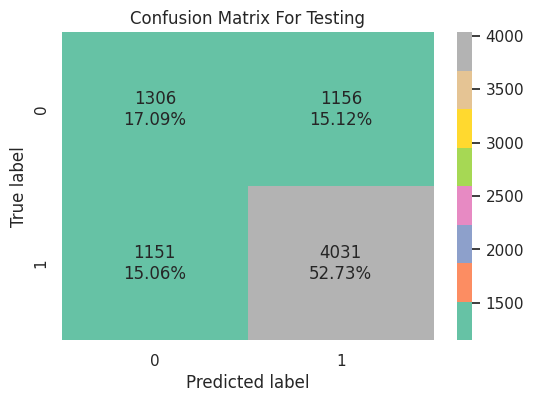

In [414]:
# Show Confusion Matrix on test data and training

confusion_matrix_sklearn(bagging, X_train, y_train,cs_training)
confusion_matrix_sklearn(bagging, X_test, y_test,cs_testing)

### Observations:
- TP,TN,FP,FN all seems to be reduced.

In [422]:
# Print Precession f1 score and recall for both train and test
bagging_performance_default_train=model_performance_classification_sklearn(model=bagging, predictors=X_train,target=y_train)
bagging_performance_default_test=model_performance_classification_sklearn(model=bagging, predictors=X_test, target=y_test)
train_performance = [
    bagging_performance_default_train.T
]
test_performance = [
    bagging_performance_default_test.T
]
model_names = [
    "Bagging - default",
]
# Create a dataframe with all combined
compare_model_performance(train_performance,test_performance,model_names)

,Train,Test
,Bagging - default (Train),Bagging - default (Test)
Accuracy,0.984470,0.698195
Recall,0.985299,0.777885
Precision,0.991245,0.777135
F1,0.988263,0.777510


### Observations:
- Bagging with default seems to overfit the training set.Thats why we see the higher Accuracy,Recall precision and F1 (99%) and it drastically reduced in test set.**(Accuracy:70% ,Recall:78%,Precision:78% and F1=78%)**


### Bagging Classifier with Logistic Regression

In [424]:
# Default bagging classifier with logistic regression and fit
bagging_log = BaggingClassifier(estimator=LogisticRegression(),random_state=1)
training_time_bagging_log = timeit.timeit(lambda:train_model(bagging_log,Xtrain=X_train,ytrain=y_train), number=1)
printmodelscoreandtrainTime(model=bagging_log,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,training_time=training_time_bagging_log)

Training Score 0.7049226283920161
Testing Score 0.7102302459445317
Training Time 6.962852033000672


### Obsrvations:
- Though a simpler model with LogisticRgression but it does not overfit.
- Score is same as prepruned model
- Training time is highest around 6 sec with this model .Though its known it depdends on hardware but this model constantly give this time seems to be slowest among all


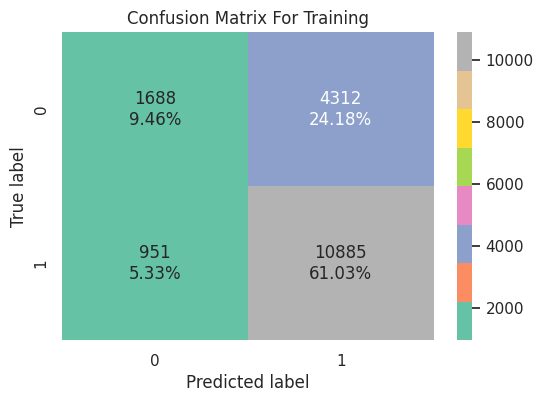

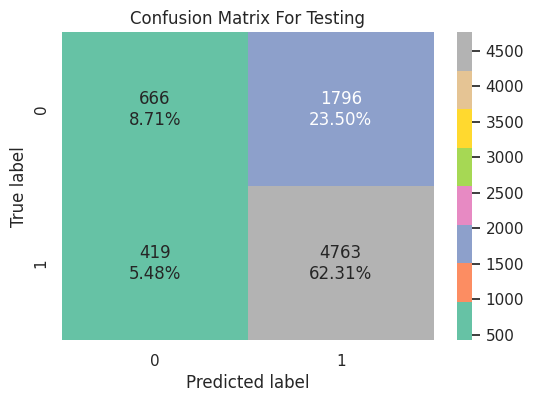

In [425]:
# Show Confusion Matrix on test data and training

confusion_matrix_sklearn(bagging_log, X_train, y_train,cs_training)
confusion_matrix_sklearn(bagging_log, X_test, y_test,cs_testing)

### Observations:
- This model can predict more certified case **(TP)**
- This model has more **FP** compared to previous models
- **FN** are reduced a bit
- Same performance as the Hypertuned decssion tree

In [426]:
# Print Precession f1 score and recall for both train and test and combine with deafult bagging model
bagging_performance_default_train_log=model_performance_classification_sklearn(model=bagging_log, predictors=X_train,target=y_train)
bagging_performance_default_test_log=model_performance_classification_sklearn(model=bagging_log, predictors=X_test, target=y_test)
train_performance_log = [
    bagging_performance_default_train.T,
    bagging_performance_default_train_log.T
]
test_performance_log = [
    bagging_performance_default_test.T,
    bagging_performance_default_test_log.T
]
# Name of model
model_names = [
    "Bagging - default",
    "Bagging - Logistic",
]
# Create a dataframe with all combined
compare_model_performance(train_performance_log,test_performance_log,model_names)

Train                             \
          Bagging - default (Train) Bagging - Logistic (Train)   
Accuracy                   0.984470                   0.704923   
Recall                     0.985299                   0.919652   
Precision                  0.991245                   0.716260   
F1                         0.988263                   0.805312   

                              Test                            
          Bagging - default (Test) Bagging - Logistic (Test)  
Accuracy                  0.698195                  0.710230  
Recall                    0.777885                  0.919143  
Precision                 0.777135                  0.726178  
F1                        0.777510                  0.811345

### Observations:
- Though logistic regression is simple model unlike decision tree it performs well with test data .
- We have observed that the perfomance of this is very near to our decession tree pre(Grid Search CV) and post prunning model which is quite impressive as **F1** score is near to **81%**, **Precision** is at **72%** and even **Recall** is at **91%**

### Random Forest Classifier


In [428]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
training_time_rf = timeit.timeit(lambda:train_model(rf_estimator,Xtrain=X_train,ytrain=y_train), number=1)
printmodelscoreandtrainTime(model=rf_estimator,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,training_time=training_time_rf)

Training Score 0.999943933617403
Testing Score 0.7254055468341183
Training Time 4.515828988000067


### Observations:
- We overfit the training set
-  Though not slowest but still slower

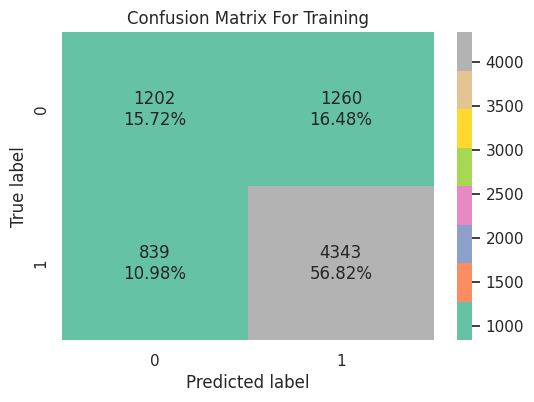

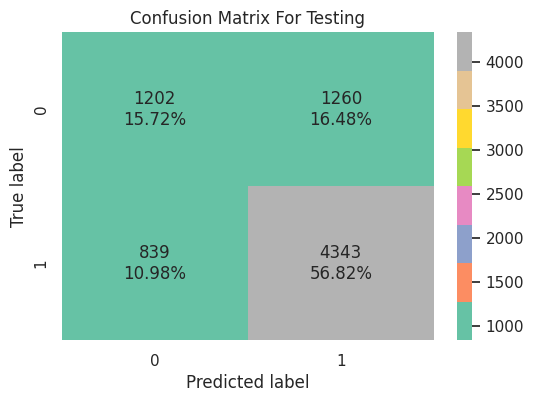

In [429]:
# Show Confusion Matrix on test data
confusion_matrix_sklearn(rf_estimator, X_test, y_test,cs_training)
confusion_matrix_sklearn(rf_estimator, X_test, y_test,cs_testing)

In [430]:
# Print Precession f1 score and recall for both train and test
rf_performance_default_train=model_performance_classification_sklearn(model=bagging, predictors=X_train,target=y_train)
rf_performance_default_test=model_performance_classification_sklearn(model=bagging, predictors=X_test, target=y_test)
train_performance_rf = [
    rf_performance_default_train.T
]
test_performance_rf = [
    rf_performance_default_test.T
]
model_names = [
    "Random Forest - default",
]
# Create a dataframe with all combined
compare_model_performance(train_performance_rf,test_performance_rf,model_names)

,Train,Test
,Random Forest - default (Train),Random Forest - default (Test)
Accuracy,0.984470,0.698195
Recall,0.985299,0.777885
Precision,0.991245,0.777135
F1,0.988263,0.777510


###Observations:
- Like decession tree and bagging deafult random forest seems to overfit and F1 score is still lesser then the postpruned decision tree and pre puned decision tree

### Hyperparameter Tuning Bagging Classifier
**Some of the important hyperparameters available for bagging classifier are:**

- base_estimator: The base estimator to fit on random subsets of the dataset. If None(default), then the base estimator is a decision tree.
- n_estimators: The number of trees in the forest, default = 100.
max_features: The number of features to consider when looking for the best split.
- bootstrap: Whether bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree, default=True.
- bootstrap_features: If it is true, then features are drawn with replacement. Default value is False.
- max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, where N is the number of observations in the train data.
- oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy, default=Fals


In [431]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters
parameters = {'max_samples': [0.7,0.8,0.9,1],
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }



# Run the grid search
grid__bagging_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring='f1',cv=4)
grid__bagging_obj = grid__bagging_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid__bagging_obj.best_estimator_



In [435]:
bagging_estimator_tuned

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=50,
                  random_state=1)

In [432]:
# Fit the best algorithm to the data.
training_time_bagging_tuned = timeit.timeit(lambda:train_model(bagging_estimator_tuned,Xtrain=X_train,ytrain=y_train), number=1)
printmodelscoreandtrainTime(model=bagging_estimator_tuned,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,training_time=training_time_bagging_tuned)

Training Score 0.9820587575689617
Testing Score 0.7348246991104134
Training Time 2.86159374700037


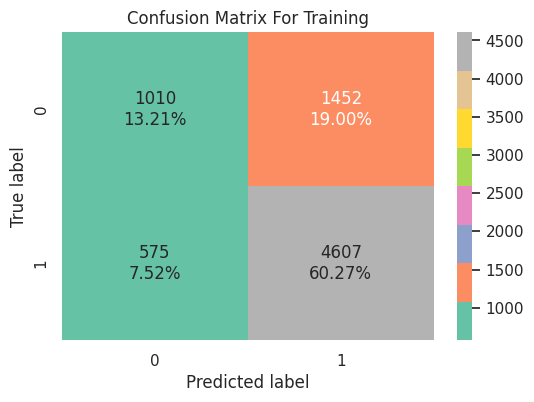

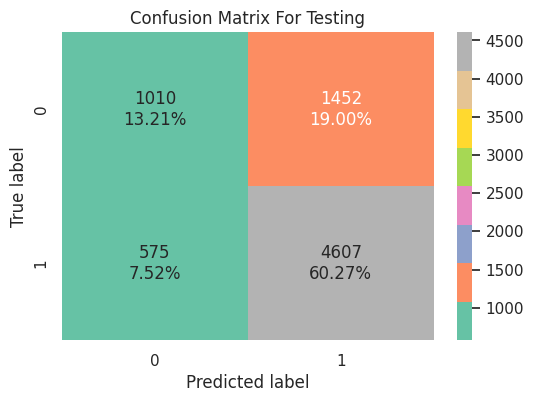

In [434]:
# Show Confusion Matrix on test data
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test,cs_training)
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test,cs_testing)

### Observation
- We observed increase in **TP** detection by model from random forest
- We observed reduction in **FN**

we still find this model is over fitting the data and performance is not same as Decisions Tree model.

In [433]:
# Print Precession f1 score and recall for both train and test
grid_bag_performance_default_train=model_performance_classification_sklearn(model=bagging_estimator_tuned, predictors=X_train,target=y_train)
grid_bag_performance_default_test=model_performance_classification_sklearn(model=bagging_estimator_tuned, predictors=X_test, target=y_test)
train_performance_grid_bag = [
    grid_bag_performance_default_train.T
]
test_performance_grid_bag = [
    grid_bag_performance_default_test.T
]
model_names = [
    "Bagging - HyperParameterTuned",
]
# Create a dataframe with all combined
compare_model_performance(train_performance_grid_bag,test_performance_grid_bag,model_names)

,Train,Test
,Bagging - HyperParameterTuned (Train),Bagging - HyperParameterTuned (Test)
Accuracy,0.982059,0.734825
Recall,0.998310,0.889039
Precision,0.975239,0.760356
F1,0.986640,0.819678


### Observations:
- After hyper parameter tuning we can see there is increase in **F1** score 82% and even **Recall** is increase to 89% as well.
- **Precision** is at 76%
- We can see the performace almost similar to decession tree pre and post prunning one.

### Random Forest Classifer Hyper Parameter Tuning

In [ ]:
# Choose the type of classifier.
rf_tree_tuned = RandomForestClassifier(random_state=1, bootstrap=True)

parameters = {
    "max_depth": [1, 2, 3, 4,5,6],
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [3, 5],
    'n_estimators' : [10,20,30,40,50],

}

# Run the grid search
grid_obj_rf = GridSearchCV(rf_tree_tuned, parameters, scoring='f1', cv=5)
grid_obj_rf = grid_obj_rf.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tree_tuned = grid_obj_rf.best_estimator_

# Fit the best algorithm to the data.
rf_tree_tuned.fit(X_train, y_train)

In [ ]:
# Print Precession f1 score and recall for both train and test
rf_tuned_performance_train=model_performance_classification_sklearn(model=rf_tree_tuned, predictors=X_train,target=y_train)
rf_tuned_performance_test=model_performance_classification_sklearn(model=rf_tree_tuned, predictors=X_test, target=y_test)
train_performance_rf_tuned= [
    rf_tuned_performance_train.T
]
test_performance_rf_tuned = [
    rf_tuned_performance_test.T
]
model_names = [
    "Random Forest - HyperParameterTuned",
]
# Create a dataframe with all combined
compare_model_performance(train_performance_rf_tuned,test_performance_rf_tuned,model_names)

### Observations:
- There is slight increase on F1 score compared to bagging tuned model (82%)
- There is increase in recall (95%) compared to bagging tuned .
- Pression is reduced by 5% (71%) compared to bagging tuned which e means there is more false positives.

In [ ]:
# Confusion Matrix on bagging estimator tuned
confusion_matrix_sklearn(rf_tree_tuned, X_test, y_test)

### Observations:
- Compared bagging classifier tuned we see a increase in model efficiency in **TP**  (65% almost by 5%)with random forest tuned
- **FN** is reduced further by 4%(2.76%)
- **FP** is increased by 5%(20%)

### AdaBoost Classifier

In [ ]:
# Adaboost Classifier training with default
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

In [ ]:
# Confusion matrix for addaboost
confusion_matrix_sklearn(ab_classifier,X_train,y_train)

In [ ]:
# Confusion Matrix on testing
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

In [ ]:
# Print Precession f1 score and recall for both train and test
ab_performance_train=model_performance_classification_sklearn(model=ab_classifier, predictors=X_train,target=y_train)
ab_performance_test=model_performance_classification_sklearn(model=ab_classifier, predictors=X_test, target=y_test)
train_performance_ada_tuned= [
    ab_performance_train.T
]
test_performance_ada_tuned = [
    ab_performance_test.T
]
model_names = [
    "Ada Boost",
]
# Create a dataframe with all combined
compare_model_performance(train_performance_ada_tuned,test_performance_ada_tuned,model_names)

### Observation:
-  The model performance is almost same as Tuned baggig classifier model with Accuracy score of 73% and F1 score of 82%


### Gradient Boosting

In [ ]:
# Create Gradient Boosting classifoer and fit with training set
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [ ]:
# Confusion matrix for gradient boost
confusion_matrix_sklearn(gbcl,X_train,y_train)

### Observation:
- There is a slight improvement with graident boosting over ada boost  in terms of **FP** .
- Slight reduction with **TP** (57%)
- This model caught the nagative pretty well **TN** (incraese in 3%)


In [ ]:
# Confusion matrix for gradient boost
confusion_matrix_sklearn(gbcl,X_test,y_test)

In [ ]:
# Print Precession f1 score and recall for both train and test
gb_performance_train=model_performance_classification_sklearn(model=gbcl, predictors=X_train,target=y_train)
gb_performance_test=model_performance_classification_sklearn(model=gbcl, predictors=X_test, target=y_test)
train_performance_gb_tuned= [
    gb_performance_train.T
]
test_performance_gb_tuned = [
    gb_performance_test.T
]
model_names = [
    "Gradinet Boost - HyperParameterTuned",
]
# Create a dataframe with all combined
compare_model_performance(train_performance_gb_tuned,test_performance_gb_tuned,model_names)

### Observations:
- This model precision is better (78%)
- F1 score is same as adaboost and other equivellent tuned model we had covered before


### Gradinet Boosting With Class Weights

In [ ]:
# Compute sample weights
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)
# Initialize and train Gradient Boosting with sample weights
gb_clf_tuned = GradientBoostingClassifier(random_state=1)
gb_clf_tuned.fit(X_train, y_train, sample_weight=sample_weights)


In [ ]:
# Confusion matrix for gradient boost
confusion_matrix_sklearn(gb_clf_tuned,X_test,y_test)
confusion_matrix_sklearn(gb_clf_tuned,X_test,y_test)

In [ ]:
# Print Precession f1 score and recall for both train and test
gb_clf_tuned_performance_train=model_performance_classification_sklearn(model=gb_clf_tuned, predictors=X_train,target=y_train)
gb_clf_tuned_performance_test=model_performance_classification_sklearn(model=gb_clf_tuned, predictors=X_test, target=y_test)
train_performance_gb_clf_tuned= [
    gb_clf_tuned_performance_train.T
]
test_performance_gb_clf_tuned_tuned = [
    gb_clf_tuned_performance_test.T
]
model_names = [
    "Gradinet Boost - HyperParameterTuned",
]
# Create a dataframe with all combined
compare_model_performance(train_performance_gb_clf_tuned,test_performance_gb_clf_tuned_tuned,model_names)

### Observation:
Though we had increased precession here but with this F1 score reduced .

### Gradinet Boosting With Grid Serach CV

In [ ]:
# # Define the parameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 4, 5],
#     'subsample': [0.8, 1.0]
# }
# # Initialize the grid search
# grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='accuracy')


### XGBoost Classifier


In [ ]:
# Create XG Boost and fit
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

In [ ]:
# Confusion matrix for XG boost on trainings
confusion_matrix_sklearn(xgb,X_train,y_train)

In [ ]:
# Confusion Matrix on testing
confusion_matrix_sklearn(xgb,X_test,y_test)

### Observations:
Model performance is almost same with addaboost and gradient boost with test set just slight variation.

In [ ]:
# Print Precession f1 score and recall for both train and test
xgb_performance_train=model_performance_classification_sklearn(model=xgb, predictors=X_train,target=y_train)
xgb_performance_test=model_performance_classification_sklearn(model=xgb, predictors=X_test, target=y_test)
train_performance_xgb_tuned= [
    xgb_performance_train.T
]
test_performance_xgb_tuned = [
    xgb_performance_test.T
]
model_names = [
    "XGradinet Boost",
]
# Create a dataframe with all combined
compare_model_performance(train_performance_xgb_tuned,test_performance_xgb_tuned,model_names)

### Observations:
- F1 score is dropped a little compared to Addaboost and gradinet boost (81%)
- Precession is at 77% Reduced in compared to gradinet boosting.
- Recall is at 85%

### Cat Boost (We donot need Encoding)

In [ ]:
# Split the data
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X, y, test_size=0.3, random_state=1)

# Identify categorical feature indices
cat_features = X_train_cat.select_dtypes(include=['category', 'object']).columns
cat_feature_indices = [X_train_cat.columns.get_loc(col) for col in cat_features]

# Create and fit the CatBoostClassifier
catb = CatBoostClassifier(cat_features=cat_feature_indices, random_state=1, verbose=0)
catb.fit(X_train_cat, y_train_cat)


In [ ]:
# Confusion matrix for cat boost on trainings
confusion_matrix_sklearn(catb,X_train_cat,y_train_cat)
print("For Test data")
confusion_matrix_sklearn(catb,X_test_cat,y_test_cat)

In [ ]:
 #Print Precession f1 score and recall for both train and test
catb_performance_train=model_performance_classification_sklearn(model=catb, predictors=X_train_cat,target=y_train_cat)
catb_performance_test=model_performance_classification_sklearn(model=catb, predictors=X_test_cat, target=y_test_cat)
train_performance_catb_tuned= [
    catb_performance_train.T
]
test_performance_catb_tuned = [
    catb_performance_test.T
]
model_names = [
    "Cat Boost",
]
# Create a dataframe with all combined
compare_model_performance(train_performance_catb_tuned,test_performance_catb_tuned,model_names)

### Observations:
- Performance of catboost classifiers over all good with much handling of catogorical variable .
- F1 score is at 82% with Accuracy of model is around 74%

### LGBMClassifier

In [ ]:
# create LGBMClassifier  and test and train
lgbm = LGBMClassifier(random_state=1)
lgbm.fit(X_train, y_train)

In [ ]:
# Confusion matrix for cat boost on trainings
confusion_matrix_sklearn(lgbm,X_train,y_train)
print("For Test data")
confusion_matrix_sklearn(lgbm,X_test,y_test)

In [ ]:
 #Print Precession f1 score and recall for both train and test
lgbm_performance_train=model_performance_classification_sklearn(model=lgbm, predictors=X_train,target=y_train)
lgbm_performance_test=model_performance_classification_sklearn(model=lgbm, predictors=X_test, target=y_test)
train_performance_lgbm_tuned= [
    lgbm_performance_train.T
]
test_performance_lgbm_tuned = [
    lgbm_performance_test.T
]
model_names = [
    "LGBMClassifier",
]
# Create a dataframe with all combined
compare_model_performance(train_performance_lgbm_tuned,test_performance_lgbm_tuned,model_names)

### Observation;
- The performance of this model similar to previous good model and exactly similar to cat boost
- F1 score is at 82% with Accuracy of model is around 74%

Note : This LGBMClassifier and Cat boost  and XG Boost was comparitively faster then random forest,ada boost and gradient boost
